In [1]:
'''_In this script, we ..._'''

'_In this script, we ..._'

In [2]:
# -*- coding: utf-8 -*- #
# Authors: gracecaj@stud.ntnu.no, sbaarak@stud.ntnu.no, & annakale@stud.ntnu.no
# Date: 19/09/2023

In [3]:
#%%
#* Import the code needed
import os
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
#%%
#* Define paths
directory_path = Path('../../')

Import excel files

Import Input Parameter Data

In [5]:
pop_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Population' / 
    'regression_Population.xlsx',
    index_col=0)

historical_Pop = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'Population'
    / 'Norway_population_clean.xlsx',
    index_col=0)

PpD_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'PpD' / 
    'regression_PpD.xlsx',
    index_col=0)

historical_PpD = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'PpD' / 
    'historical_PpD.xlsx',
    index_col=0)

UFApD_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'UFApD' / 
    'regression_UFApD.xlsx',
    index_col=0)

historical_UFApD_SFH = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'UFApD' / 
    'historical_UFApD_SFH.xlsx',
    index_col=0)

historical_UFApD_TH = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'UFApD' / 
    'historical_UFApD_TH.xlsx',
    index_col=0)

historical_UFApD_AB = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 'UFApD' / 
    'historical_UFApD_AB.xlsx',
    index_col=0)

lifetime_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 
    'lifetime_regression.xlsx',
    index_col=0)

lifetime_std_dev_regression = pd.read_excel(
    directory_path / 'data' / 'regression_data' / 'Dwelling_Lifetime' / 
    'lifetime_regression.xlsx',
    index_col=0)

historical_lifetime = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 
    'Dwelling_Lifetime' / 'Cleaned_Dwelling_Lifetime.xlsx',
    index_col=0)

historical_lifetime_std_dev = pd.read_excel(
    directory_path / 'data' / 'cleaned_and_combined_data' / 
    'Dwelling_Lifetime' / 'Cleaned_Dwelling_Lifetime.xlsx',
    index_col=0)

historical_lifetime = historical_lifetime.drop('std_dev', axis=1)
historical_lifetime_std_dev = historical_lifetime_std_dev.drop(
    'Average lifetime', axis=1)

lifetime_regression = lifetime_regression.drop('std_dev', axis=1)
lifetime_standard_deviation_regression = lifetime_std_dev_regression.drop(
    'Avg_lifetime', axis=1)


Import Model Output Data

In [6]:
s_SFH_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' /  's_SFH.xlsx',
    index_col=0)

s_TH_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_TH.xlsx',
    index_col=0)

s_AB_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_AB.xlsx',
    index_col=0)

SFH_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_c_SFH.xlsx',
    index_col=0)

TH_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_c_TH.xlsx',
    index_col=0)

AB_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_c_AB.xlsx',
    index_col=0)

stock_change_total = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_delta_total.xlsx',
    index_col=0)

total_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 's_c_total.xlsx',
    index_col=0)

i_SFH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'i_SFH.xlsx',
    index_col=0)

i_TH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'i_TH.xlsx',
    index_col=0)

i_AB = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'i_AB.xlsx',
    index_col=0)

o_total = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'o_total.xlsx',
    index_col=0)

i_total = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 
    'number_of_dwellings' / 'i_total.xlsx',
    index_col=0)

s_UFA_c_SFH_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_c_SFH.xlsx',
    index_col=0)

s_UFA_c_TH_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_c_TH.xlsx',
    index_col=0)

s_UFA_c_AB_df = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_c_AB.xlsx',
    index_col=0)

SFH_UFA_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_tabula_SFH.xlsx',
    index_col=0)

TH_UFA_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_tabula_TH.xlsx',
    index_col=0)

AB_UFA_stock_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_tabula_AB.xlsx',
    index_col=0)

stock_change_total_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_delta_total_UFA.xlsx',
    index_col=0)

total_stock_UFA_by_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    's_UFA_tabula_total.xlsx',
    index_col=0)

i_SFH_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'i_SFH_UFA.xlsx',
    index_col=0)

i_TH_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'i_TH_UFA.xlsx',
    index_col=0)

i_AB_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'i_AB_UFA.xlsx',
    index_col=0)

o_total_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'o_total_UFA.xlsx',
    index_col=0)

i_total_UFA = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'UFA' / 
    'i_total_UFA.xlsx',
    index_col=0)

energy_use_vector_SFH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'energy_use_vector_SFH.xlsx',
    index_col=0)

energy_use_vector_TH = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'energy_use_vector_TH.xlsx',
    index_col=0)

energy_use_vector_AB = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'energy_use_vector_AB.xlsx',
    index_col=0)

energy_use_matrix_total_tabula_cohort = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'energy_use_matrix_total_tabula.xlsx',
    index_col=0)

total_energy_use = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'total_energy_use.xlsx',
    index_col=0)

total_carbon_emissions = pd.read_excel(
    directory_path / 'data' / 'model_outputs_baseline' / 'energy' / 
    'total_carbon_emissions.xlsx',
    index_col=0)


i_SFH = i_SFH.set_index(np.arange(1600,2051))
i_TH = i_TH.set_index(np.arange(1600,2051))
i_AB = i_AB.set_index(np.arange(1600,2051))

Import Validation Data

In [7]:
stock_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'Dwelling_Stock_validation_data.xlsx',
    index_col=0, sheet_name='Sheet1')

inflow_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'inflow_val_try_2.xlsx',
    sheet_name='Sheet1',index_col=0).T

outflow_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'Outflow_validation_data.xlsx',
    index_col=0).T

energy_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'energy_validation_data_2.xlsx',
    index_col=0)

UFA_stock_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'UFA_stock_validation.xlsx',
    index_col=0)

UFA_inflow_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'UFA_inflow_validation.xlsx',
    sheet_name='Sheet2', index_col=0)

carbon_emissions_validation = pd.read_excel(
    directory_path / 'data' / 'Validation data' / 
    'carbon_validation_all_GHGs.xlsx',
    index_col=0)

Plot model inputs

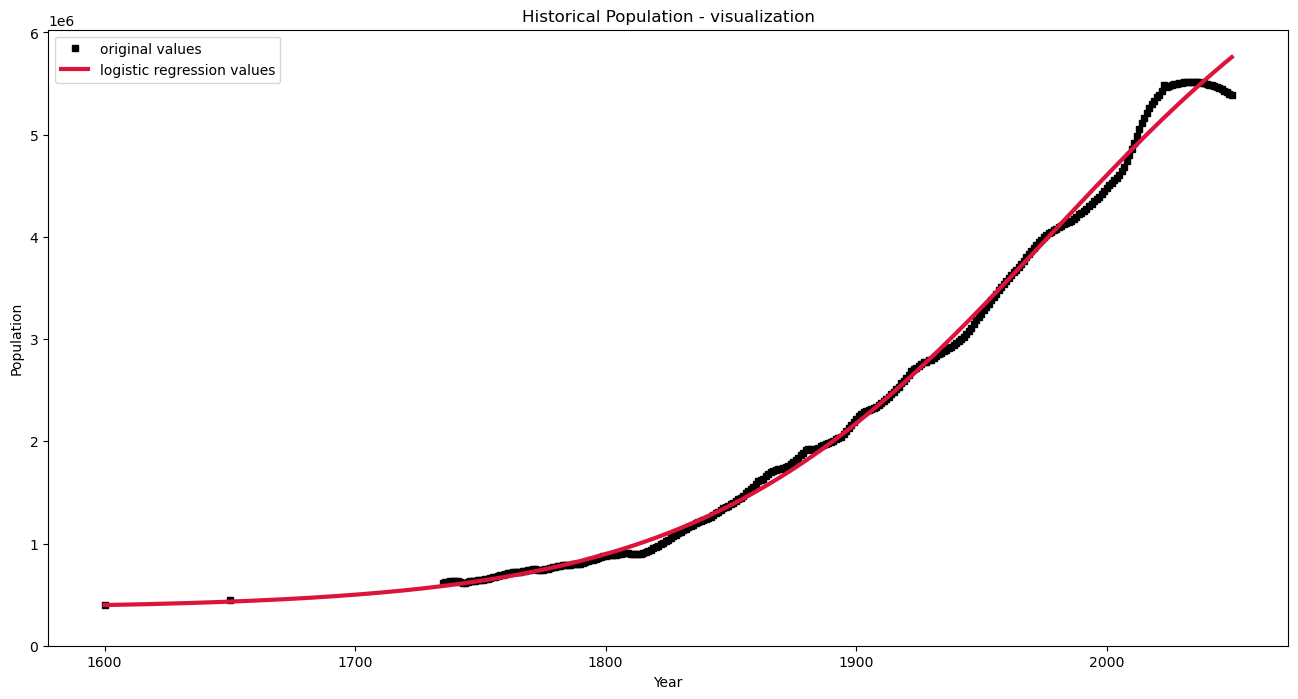

<Figure size 640x480 with 0 Axes>

In [8]:
#Pop

fig=plt.figure(figsize = (16,8))
plt.plot(
    historical_Pop.index, historical_Pop, 's', color = 'black', 
    markersize = 5, label = f'original values')
plt.plot(
    pop_regression.index, pop_regression, color = 'crimson', lw = 3, 
    label = 'logistic regression values')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Historical Population - visualization')
plt.ylim(bottom=0)
plt.show()
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_pop.jpeg',
    bbox_inches='tight')

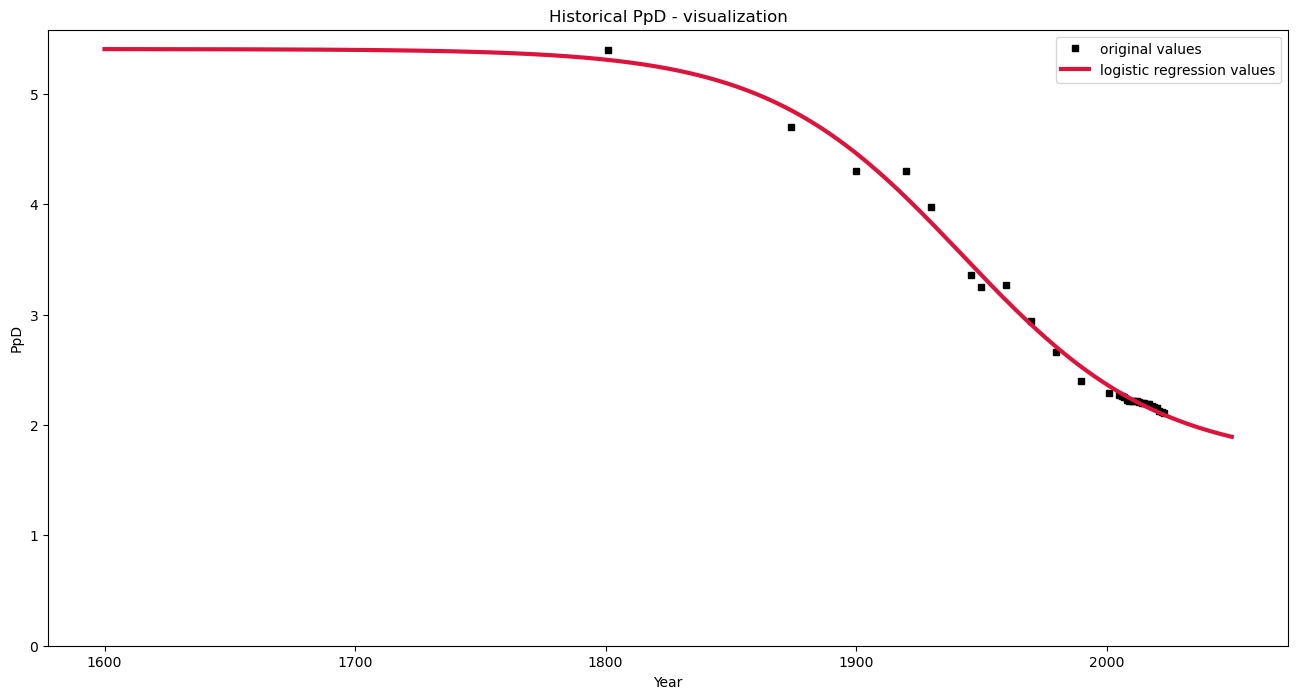

<Figure size 640x480 with 0 Axes>

In [9]:
#PpD

plt.figure(figsize = (16,8))
plt.plot(historical_PpD.index, historical_PpD, 's', color = 'black', 
         markersize = 5, label = f'original values')
plt.plot(PpD_regression.index, PpD_regression, color = 'crimson', 
         lw = 3, label = 'logistic regression values')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('PpD')
plt.title('Historical PpD - visualization')
plt.ylim(bottom=0)
plt.show()
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_ppd.jpeg', 
    bbox_inches='tight')

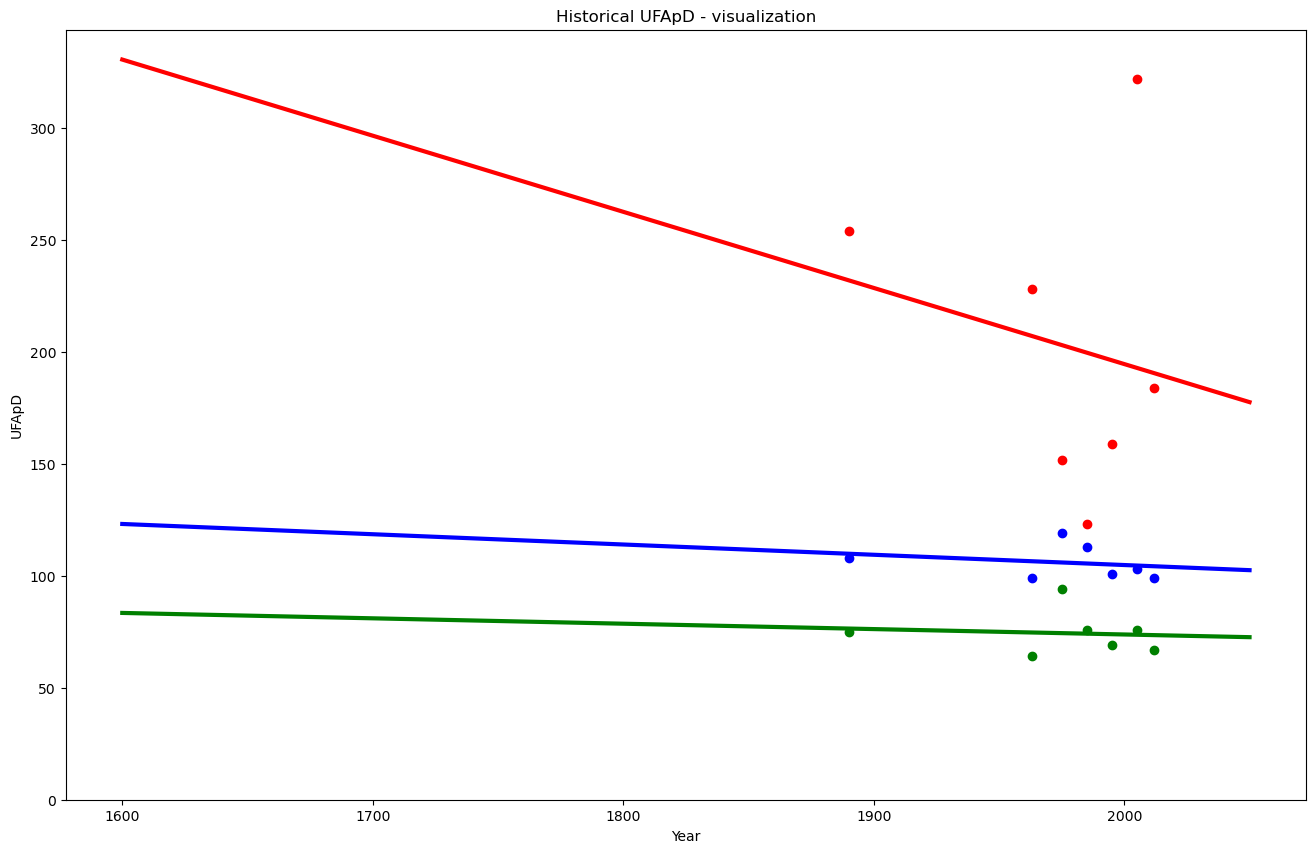

<Figure size 640x480 with 0 Axes>

In [10]:
#UFApD

plt.figure(figsize=(16,10))
plt.scatter(
    historical_UFApD_SFH.index, historical_UFApD_SFH['UFApD'], c='red')
plt.scatter(
    historical_UFApD_TH.index, historical_UFApD_TH['UFApD'], c='blue')
plt.scatter(
    historical_UFApD_AB.index, historical_UFApD_AB['UFApD'], c='green')

plt.plot(
    UFApD_regression.index, UFApD_regression['UFApD SFH'], 
    color = 'red', lw = 3, label='SFH regression')
plt.plot(
    UFApD_regression.index, UFApD_regression['UFApD TH'], 
    color = 'blue', lw = 3, label='SFH regression')
plt.plot(
    UFApD_regression.index, UFApD_regression['UFApD AB'], 
    color = 'green', lw = 3, label='SFH regression')

plt.xlabel('Year')
plt.ylabel('UFApD')
plt.title('Historical UFApD - visualization')
plt.ylim(bottom=0)
plt.show()

plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_ufapd.jpeg', 
    bbox_inches='tight')

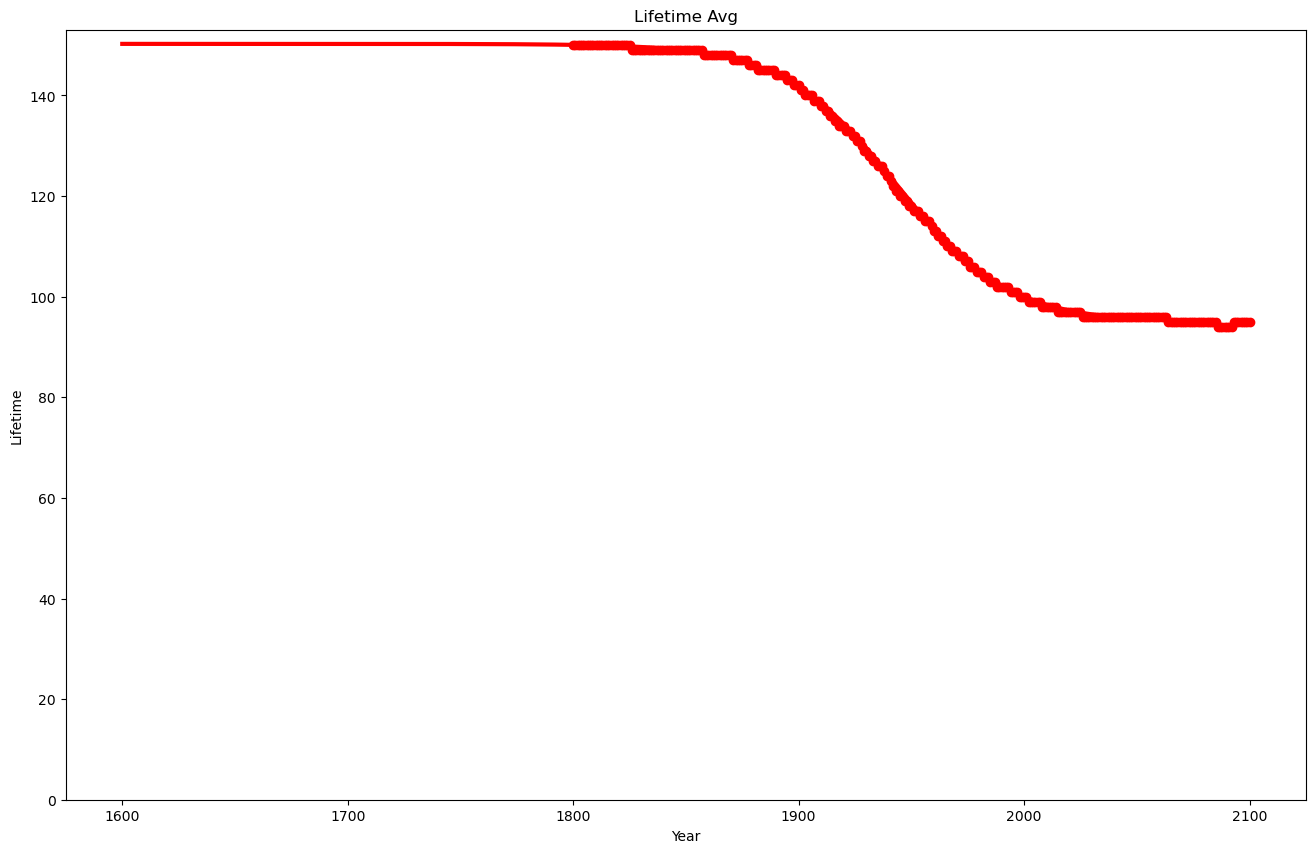

<Figure size 640x480 with 0 Axes>

In [11]:
# Lifetime

plt.figure(figsize=(16,10))
plt.scatter(
    historical_lifetime.index, historical_lifetime['Average lifetime'], 
    c='red')
plt.plot(
    lifetime_regression.index, lifetime_regression['Avg_lifetime'], 
    color = 'red', lw = 3, label='SFH regression')
plt.xlabel('Year')
plt.ylabel('Lifetime')
plt.title('Lifetime Avg')
plt.ylim(bottom=0)
plt.show()
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_lifetime.jpeg', 
    bbox_inches='tight')

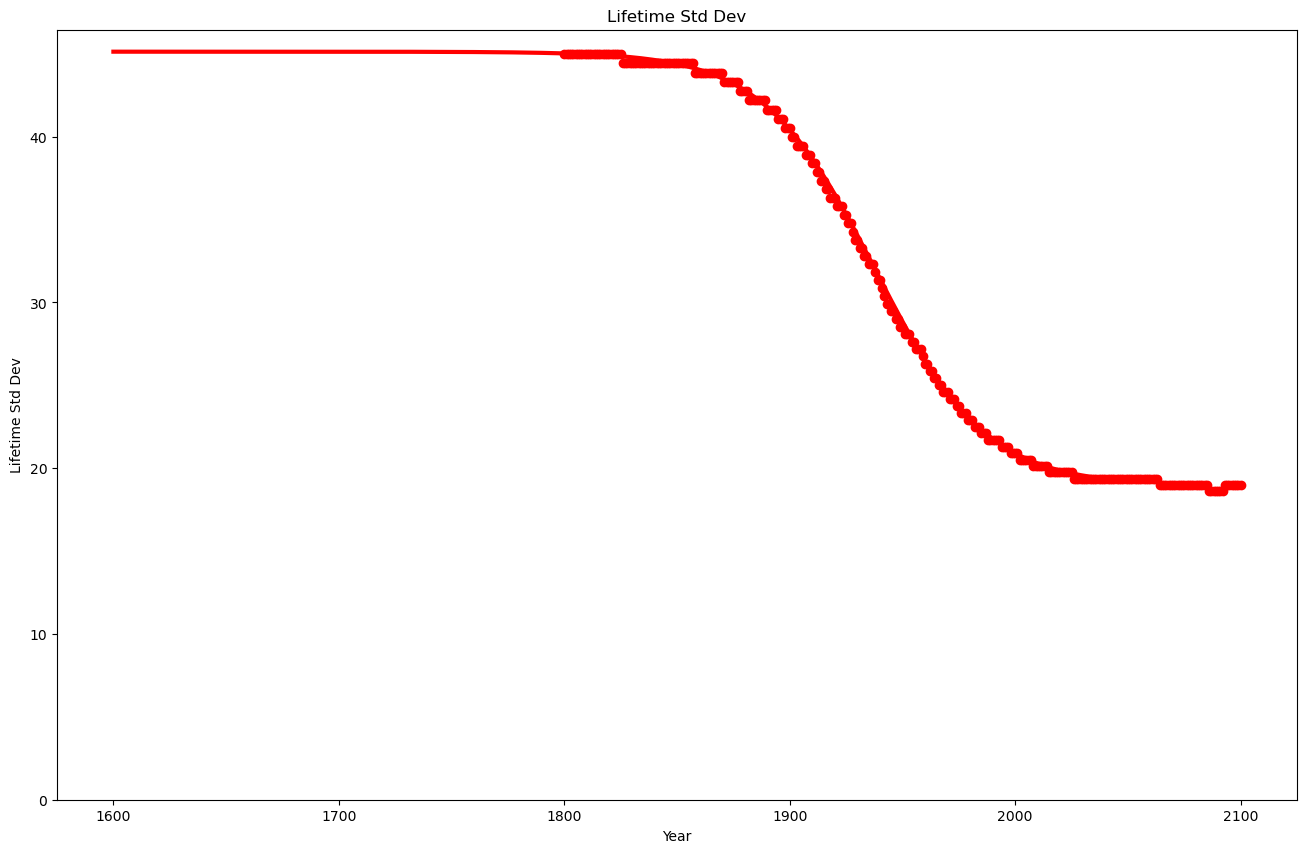

<Figure size 640x480 with 0 Axes>

In [12]:
# Lifetime std dev

plt.figure(figsize=(16,10))
plt.scatter(
    historical_lifetime_std_dev.index, 
    historical_lifetime_std_dev['std_dev'], c='red')
plt.plot(
    lifetime_std_dev_regression.index, 
    lifetime_std_dev_regression['std_dev'], color = 'red', lw = 3, 
    label='SFH regression')
plt.xlabel('Year')
plt.ylabel('Lifetime Std Dev')
plt.title('Lifetime Std Dev')
plt.ylim(bottom=0)
plt.show()
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_inputs/calibration_validation_lifetime_std_dev.jpeg', 
    bbox_inches='tight')

Plot model outputs

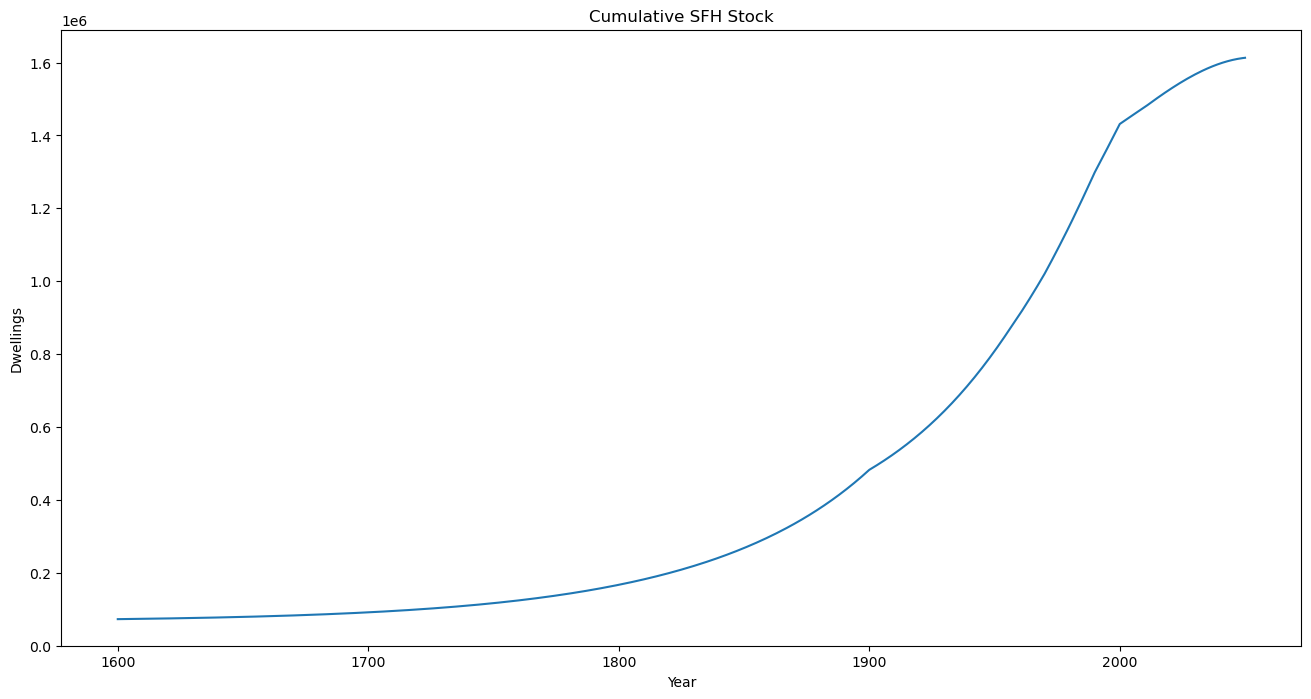

In [13]:
# Plot SFH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_SFH_df)
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_sfh.jpeg', 
    bbox_inches='tight')

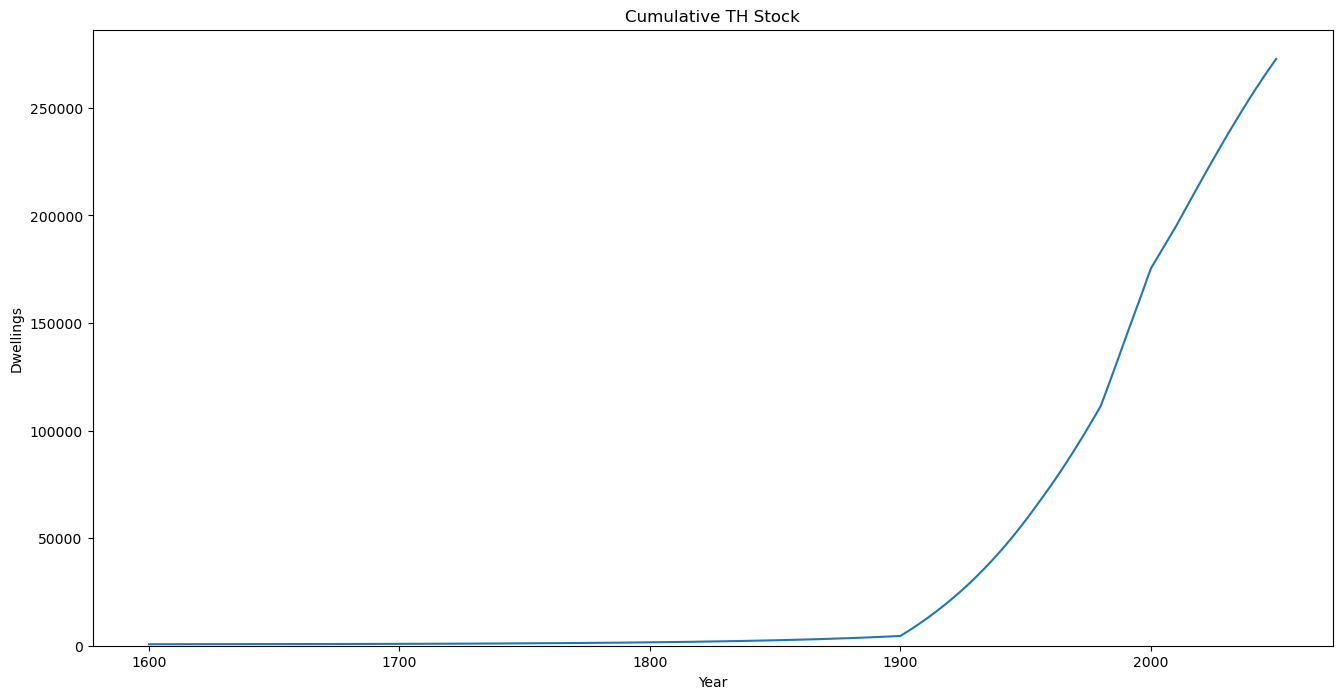

In [14]:
# Plot TH total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_TH_df)
plt.title('Cumulative TH Stock')
plt.xlabel('Year')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_th.jpeg', 
    bbox_inches='tight')

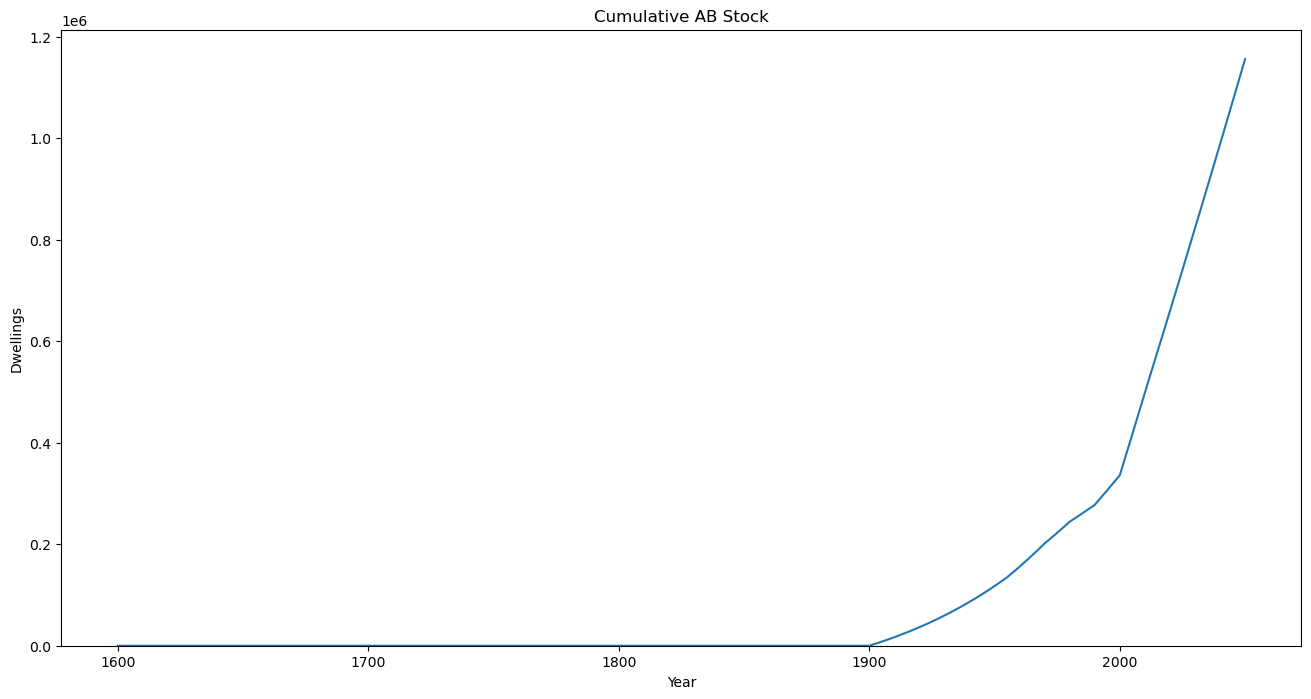

In [15]:
# Plot AB total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_AB_df)
plt.title('Cumulative AB Stock')
plt.xlabel('Year')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_ab.jpeg', 
    bbox_inches='tight')

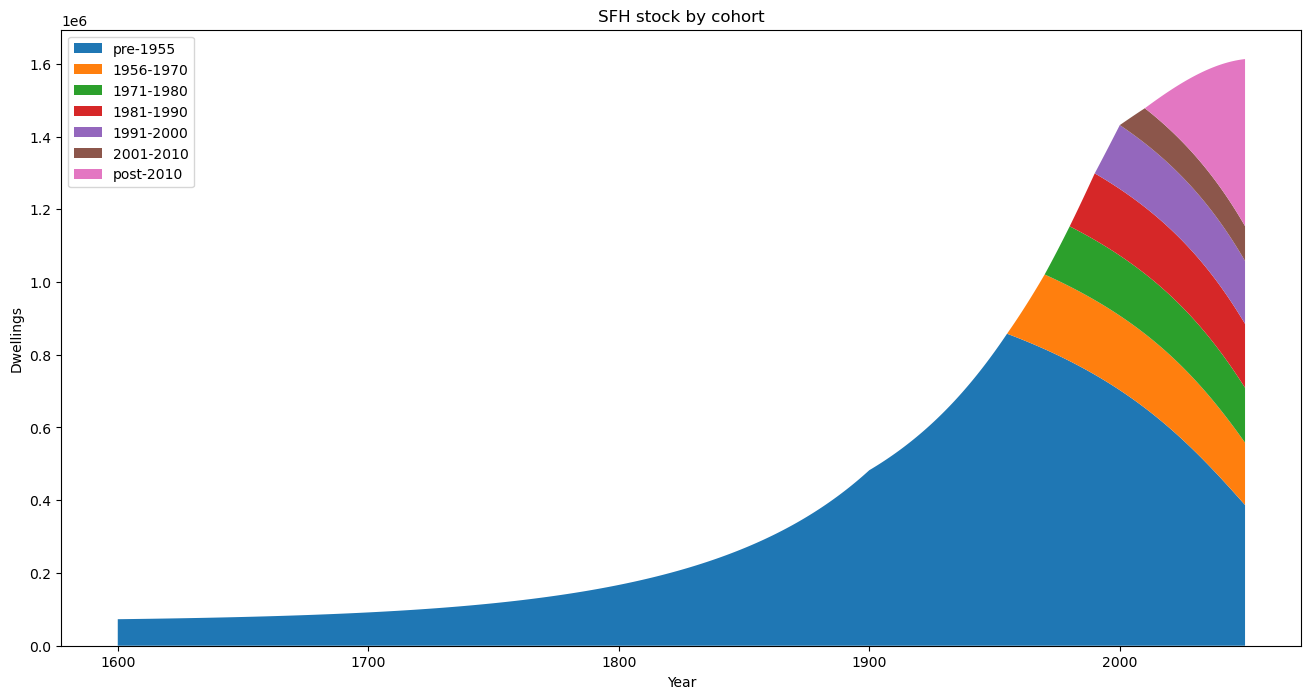

In [16]:
# Plot SFH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), SFH_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    SFH_stock_by_tabula_cohort.loc[:,'1956-1970'],
    SFH_stock_by_tabula_cohort.loc[:,'1971-1980'],
    SFH_stock_by_tabula_cohort.loc[:,'1981-1990'],
    SFH_stock_by_tabula_cohort.loc[:,'1991-2000'],
    SFH_stock_by_tabula_cohort.loc[:,'2001-2010'],
    SFH_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('SFH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_by_cohort_sfh.jpeg', 
    bbox_inches='tight')

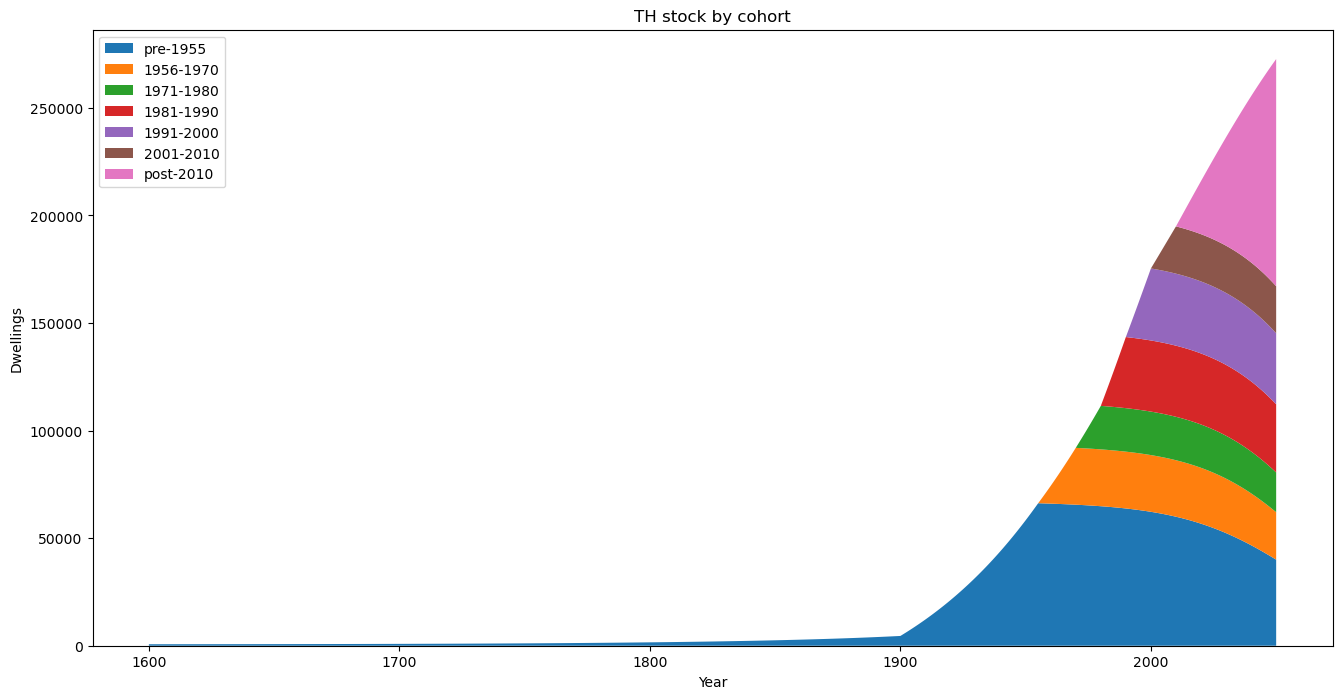

In [17]:
# Plot TH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), TH_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    TH_stock_by_tabula_cohort.loc[:,'1956-1970'],
    TH_stock_by_tabula_cohort.loc[:,'1971-1980'],
    TH_stock_by_tabula_cohort.loc[:,'1981-1990'],
    TH_stock_by_tabula_cohort.loc[:,'1991-2000'],
    TH_stock_by_tabula_cohort.loc[:,'2001-2010'],
    TH_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('TH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_by_cohort_th.jpeg',
    bbox_inches='tight')

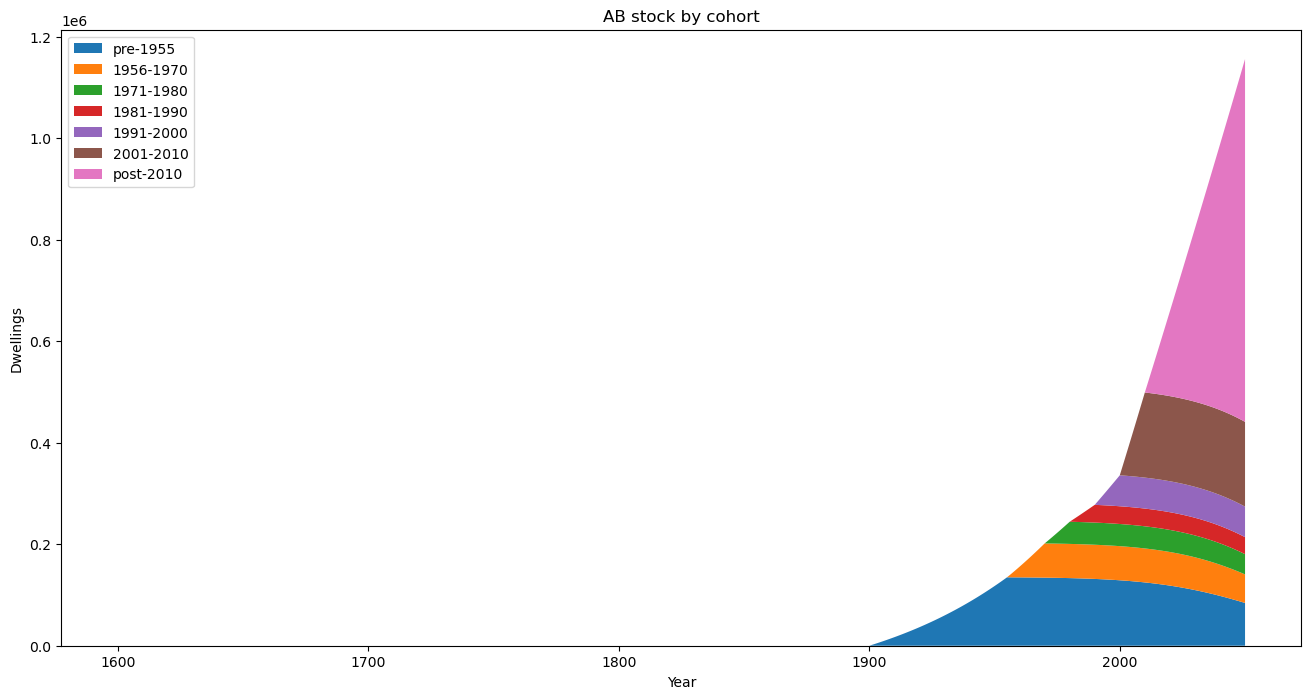

In [18]:
# Plot AB stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), AB_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    AB_stock_by_tabula_cohort.loc[:,'1956-1970'],
    AB_stock_by_tabula_cohort.loc[:,'1971-1980'],
    AB_stock_by_tabula_cohort.loc[:,'1981-1990'],
    AB_stock_by_tabula_cohort.loc[:,'1991-2000'],
    AB_stock_by_tabula_cohort.loc[:,'2001-2010'],
    AB_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('AB stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_by_cohort_ab.jpeg', 
    bbox_inches='tight')

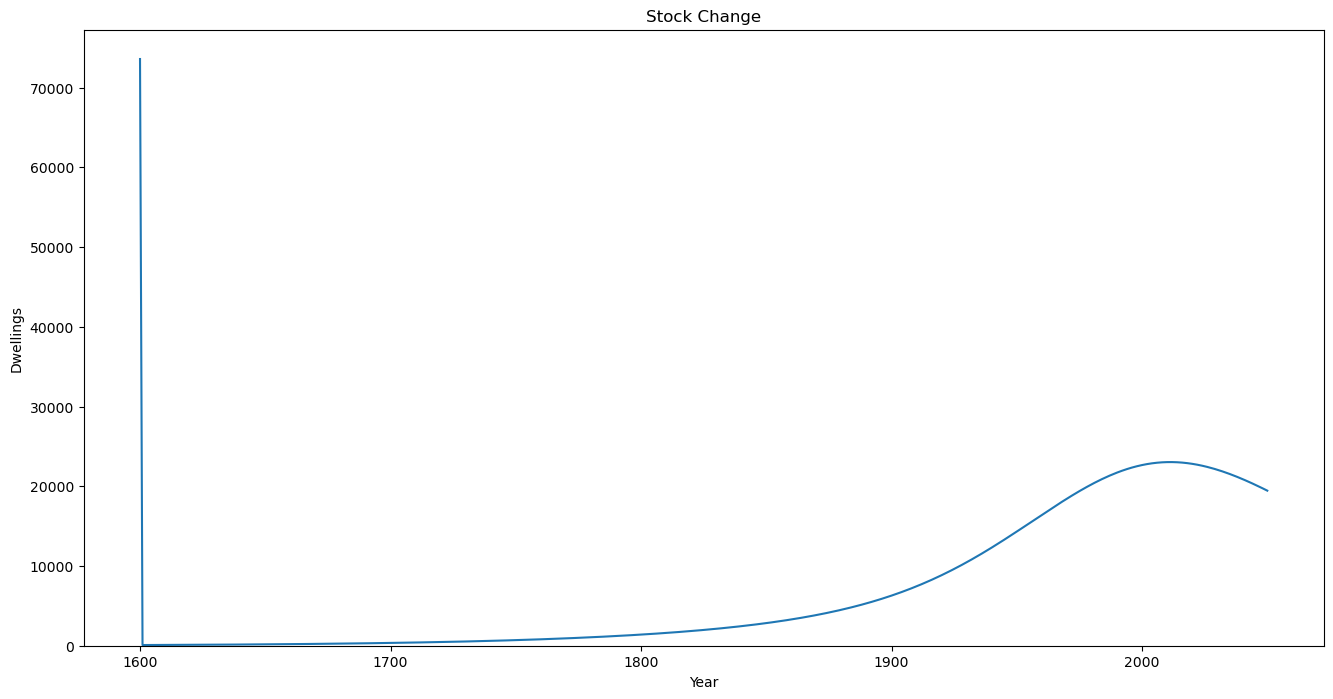

In [19]:
# Plot total stock change
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), stock_change_total.sum(axis=1))
plt.title('Stock Change')
plt.xlabel('Year')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_change.jpeg', 
    bbox_inches='tight')

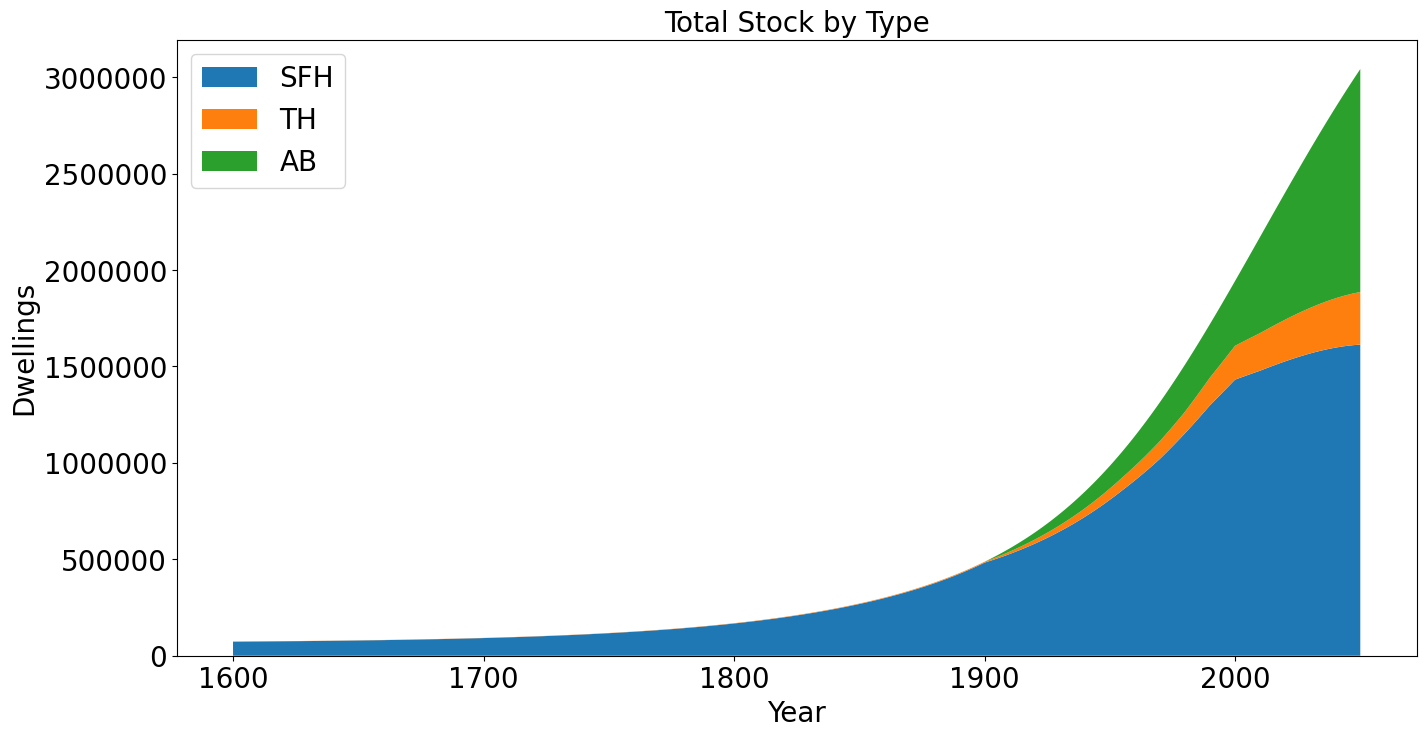

In [20]:
# Plot stock by type
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    s_SFH_df.sum(axis=1), s_TH_df.sum(axis=1), s_AB_df.sum(axis=1),
    labels=['SFH', 'TH', 'AB']
    )

plt.title('Total Stock by Type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(axis='y', style='plain')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_by_type.jpeg', 
    bbox_inches='tight')

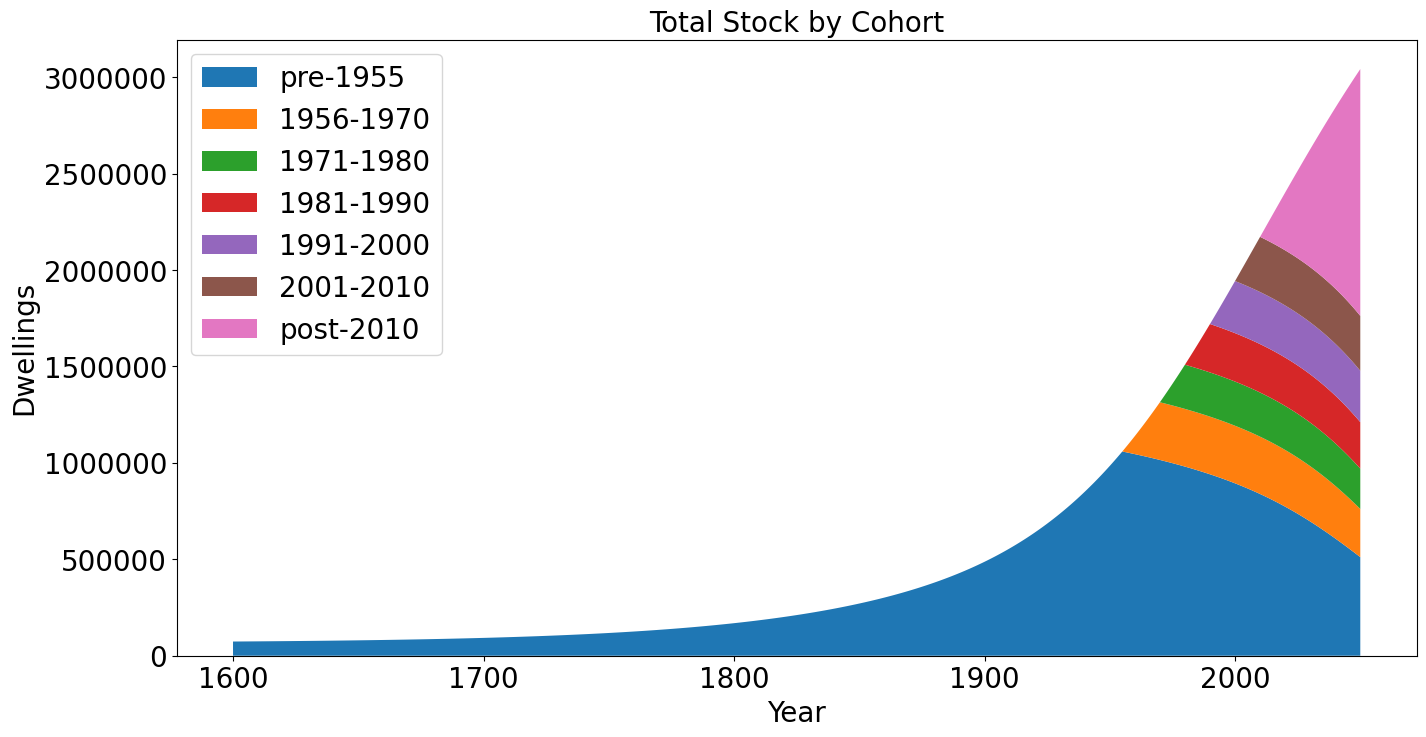

In [21]:
# Plot total stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    total_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    total_stock_by_tabula_cohort.loc[:,'1956-1970'],
    total_stock_by_tabula_cohort.loc[:,'1971-1980'],
    total_stock_by_tabula_cohort.loc[:,'1981-1990'],
    total_stock_by_tabula_cohort.loc[:,'1991-2000'],
    total_stock_by_tabula_cohort.loc[:,'2001-2010'],
    total_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('Total Stock by Cohort', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(axis='y', style='plain')
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_by_cohort.jpeg', 
    bbox_inches='tight')

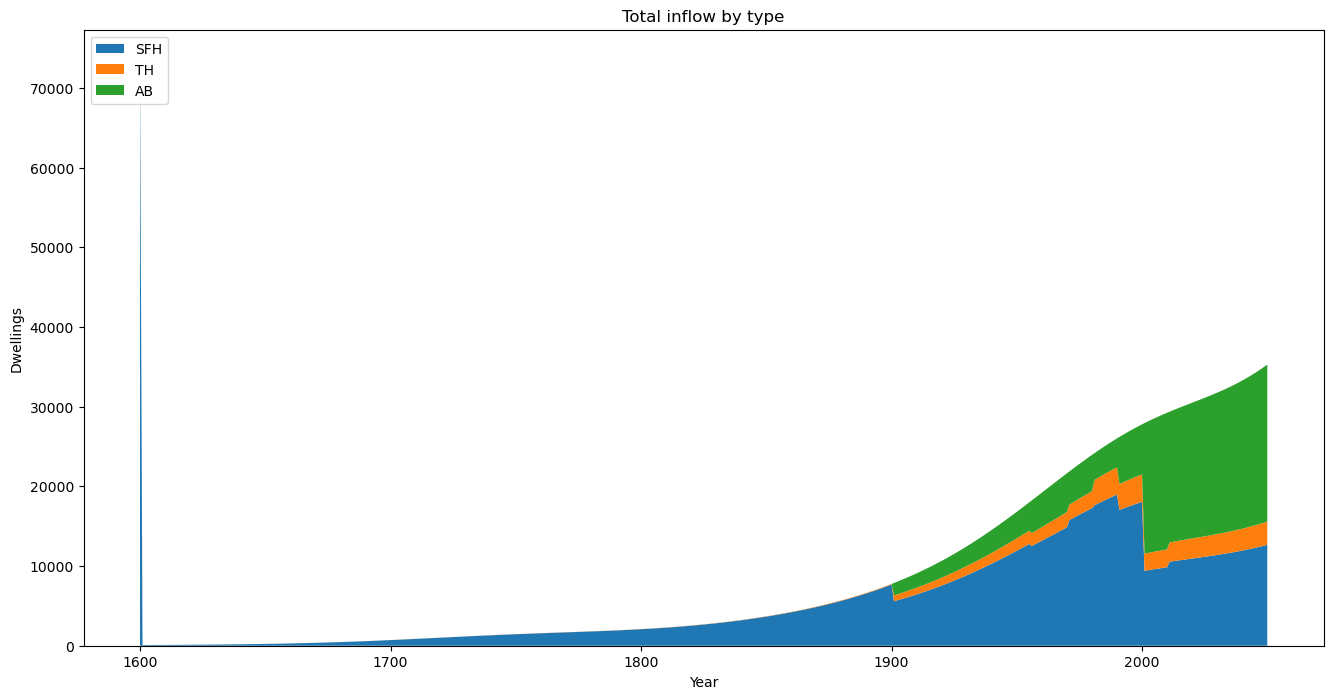

In [22]:
# Plot inflow by type
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), i_SFH.sum(axis=1), 
    i_TH.sum(axis=1),
    i_AB.sum(axis=1),
    labels=[
        'SFH', 'TH', 'AB']
    )

plt.title('Total inflow by type')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_inflow_by_type.jpeg', 
    bbox_inches='tight')

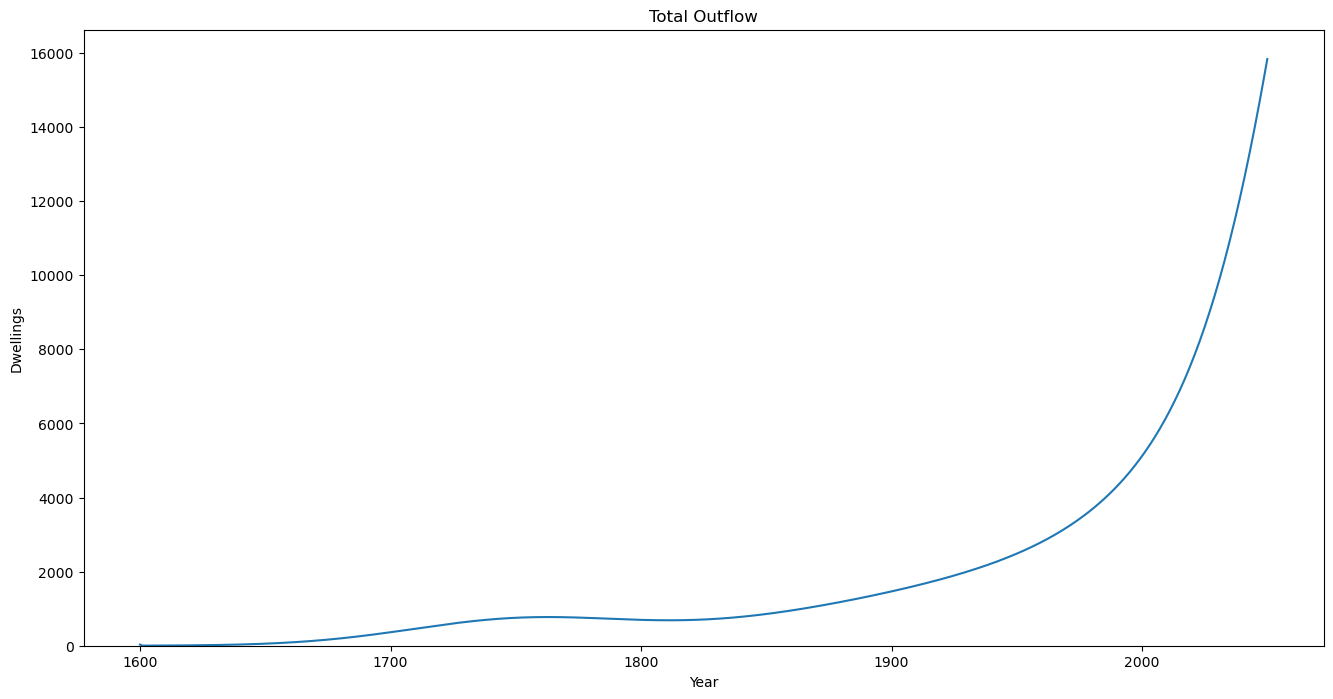

In [23]:
# Plot total outflow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), o_total.sum(axis=1))
plt.title('Total Outflow')
plt.xlabel('Year')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_outflow.jpeg', 
    bbox_inches='tight')

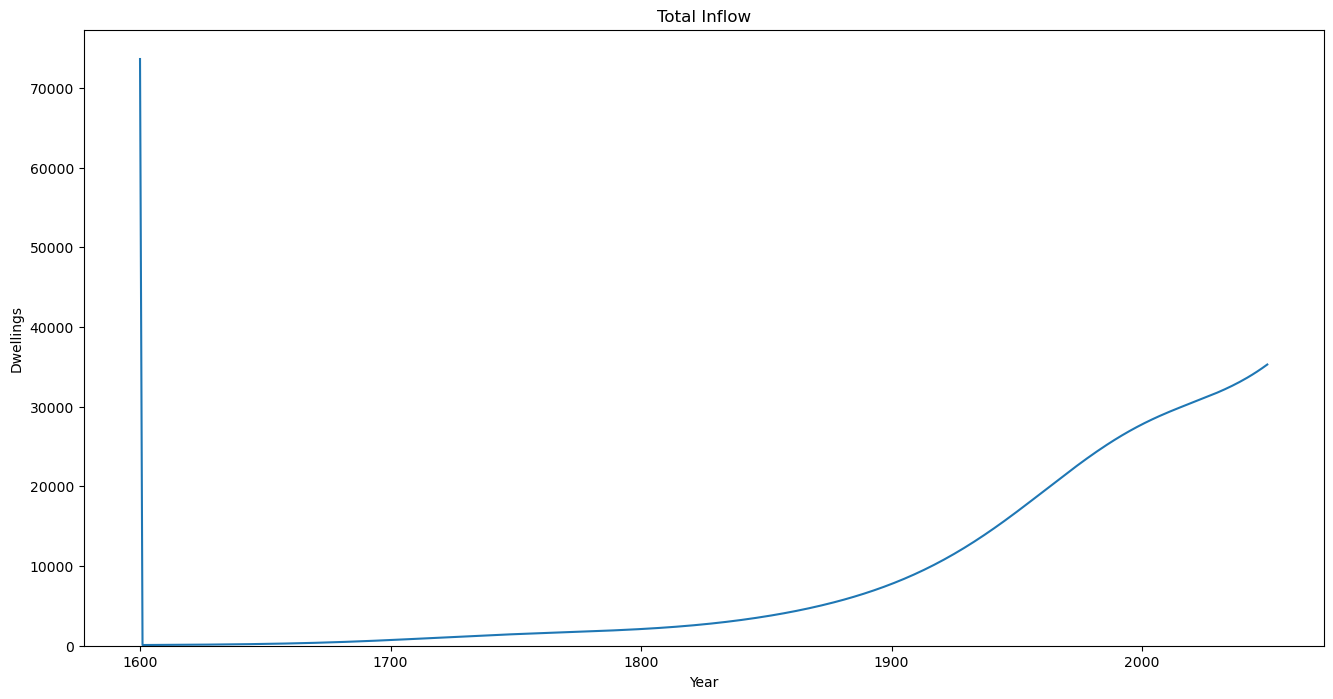

In [24]:
# Plot total inflow
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), i_total)
plt.title('Total Inflow')
plt.xlabel('Year')
plt.ylabel('Dwellings')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_inflow.jpeg', 
    bbox_inches='tight')

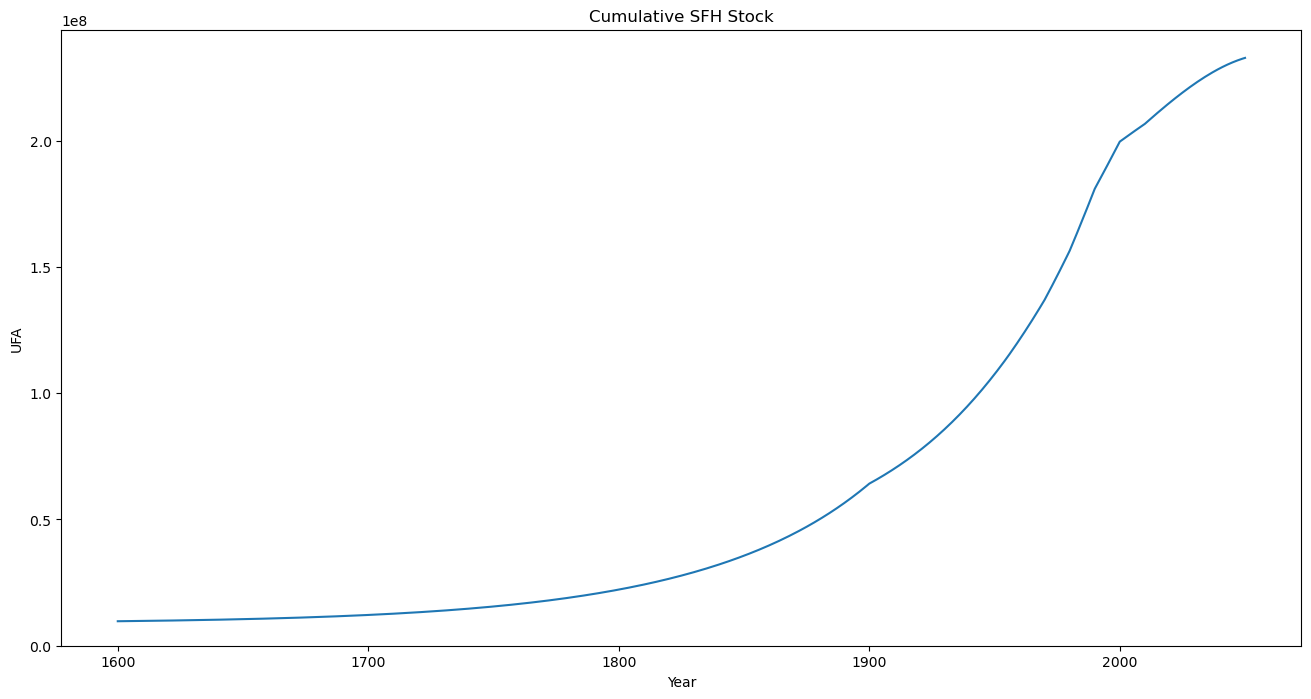

In [25]:
# Plot SFH UFA total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_UFA_c_SFH_df.sum(axis=1))
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_ufa_sfh.jpeg', 
    bbox_inches='tight')

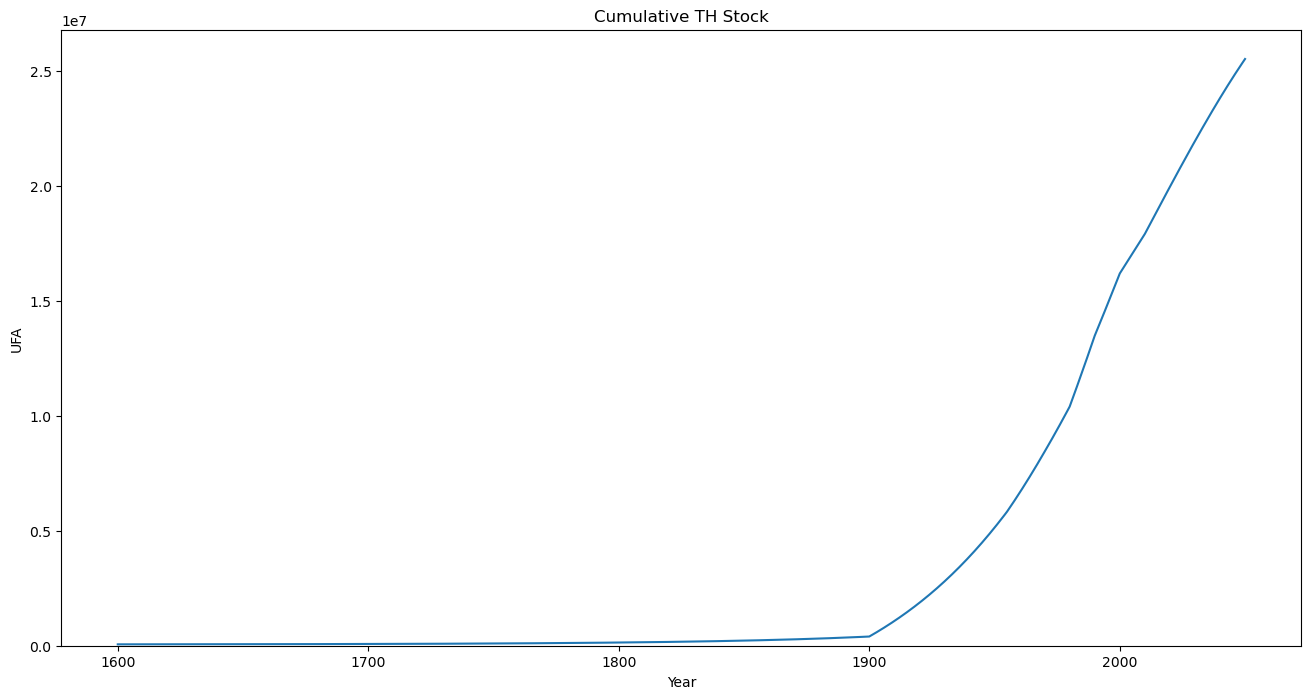

In [26]:
# Plot TH UFA total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_UFA_c_TH_df.sum(axis=1))
plt.title('Cumulative TH Stock')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_ufa_th.jpeg', 
    bbox_inches='tight')

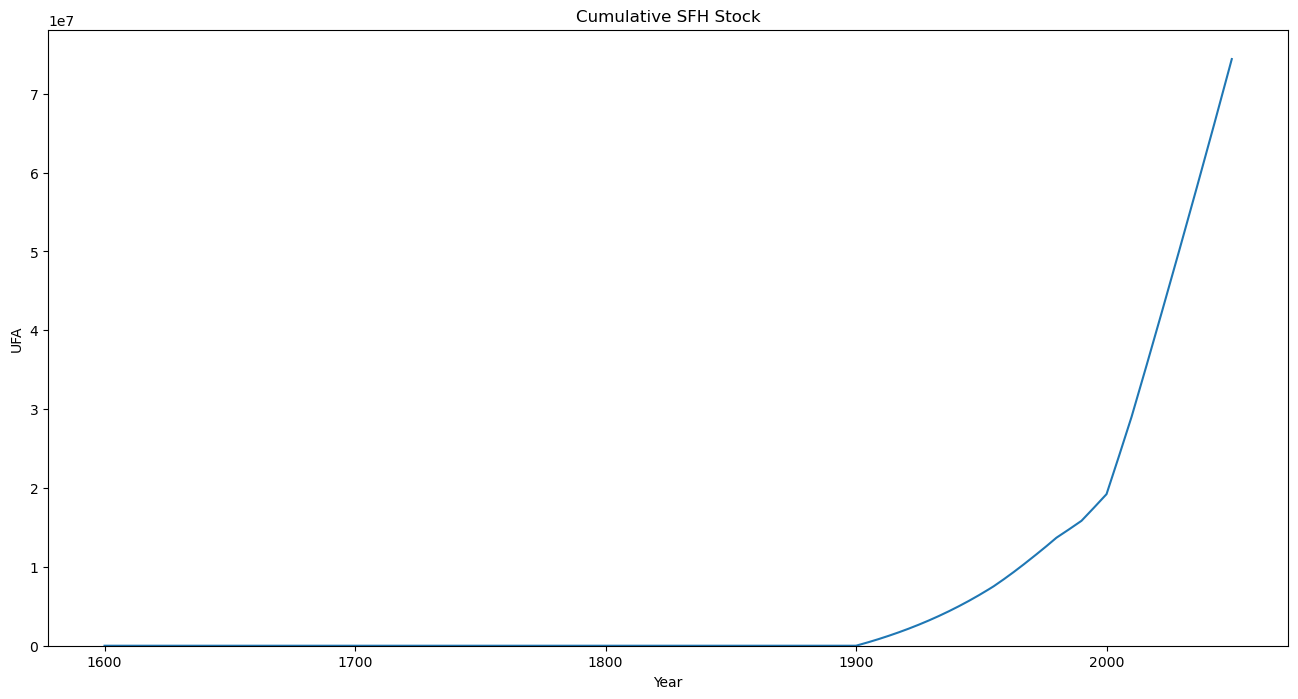

In [27]:
# Plot AB UFA total stock
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), s_UFA_c_AB_df.sum(axis=1))
plt.title('Cumulative SFH Stock')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_stock_ufa_ab.jpeg', 
    bbox_inches='tight')

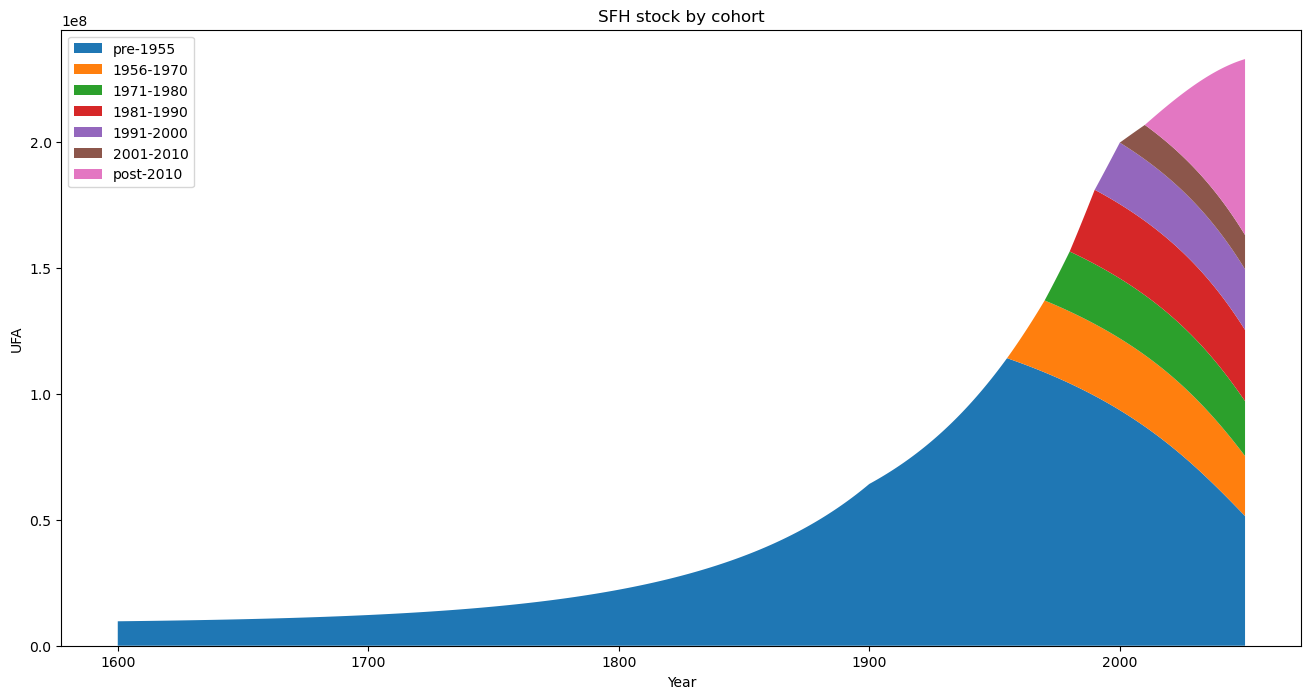

In [28]:
# Plot SFH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    SFH_UFA_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1956-1970'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1971-1980'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1981-1990'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'1991-2000'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'2001-2010'],
    SFH_UFA_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('SFH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/sfh_ufa_stock_by_cohort.jpeg', 
    bbox_inches='tight')

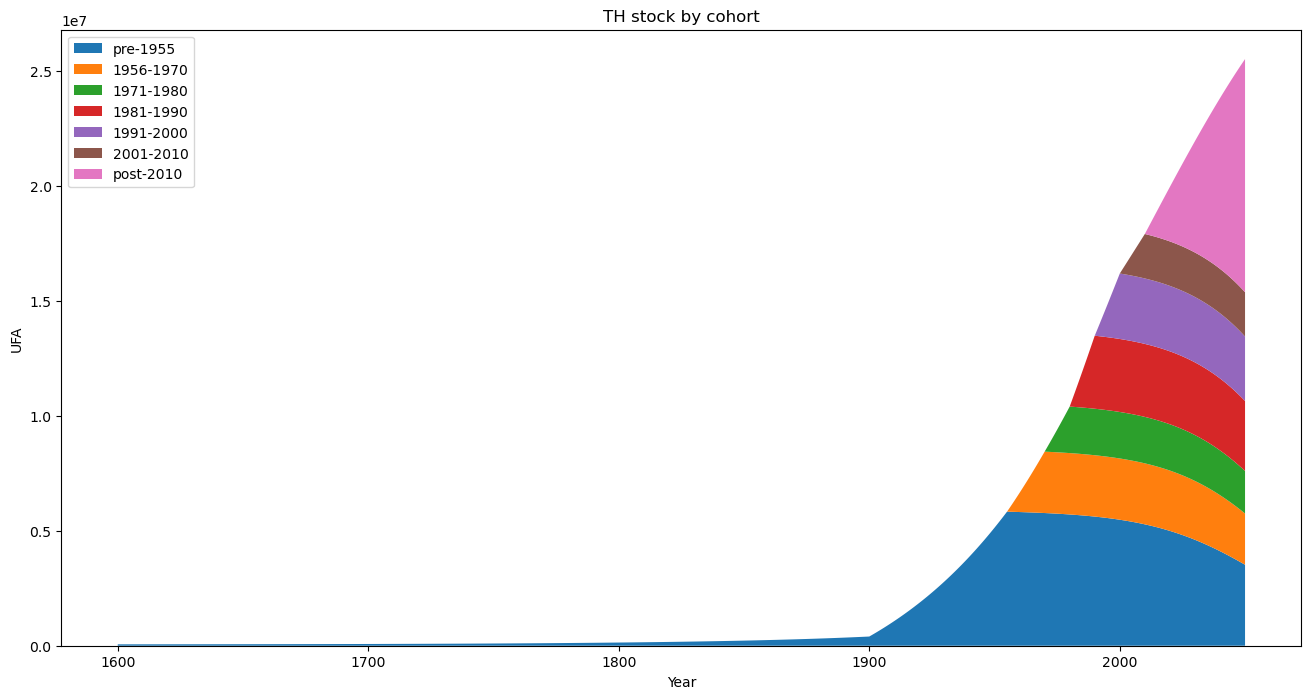

In [29]:
# Plot TH stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    TH_UFA_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    TH_UFA_stock_by_tabula_cohort.loc[:,'1956-1970'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'1971-1980'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'1981-1990'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'1991-2000'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'2001-2010'],
    TH_UFA_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('TH stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/th_ufa_stock_by_cohort.jpeg', 
    bbox_inches='tight')

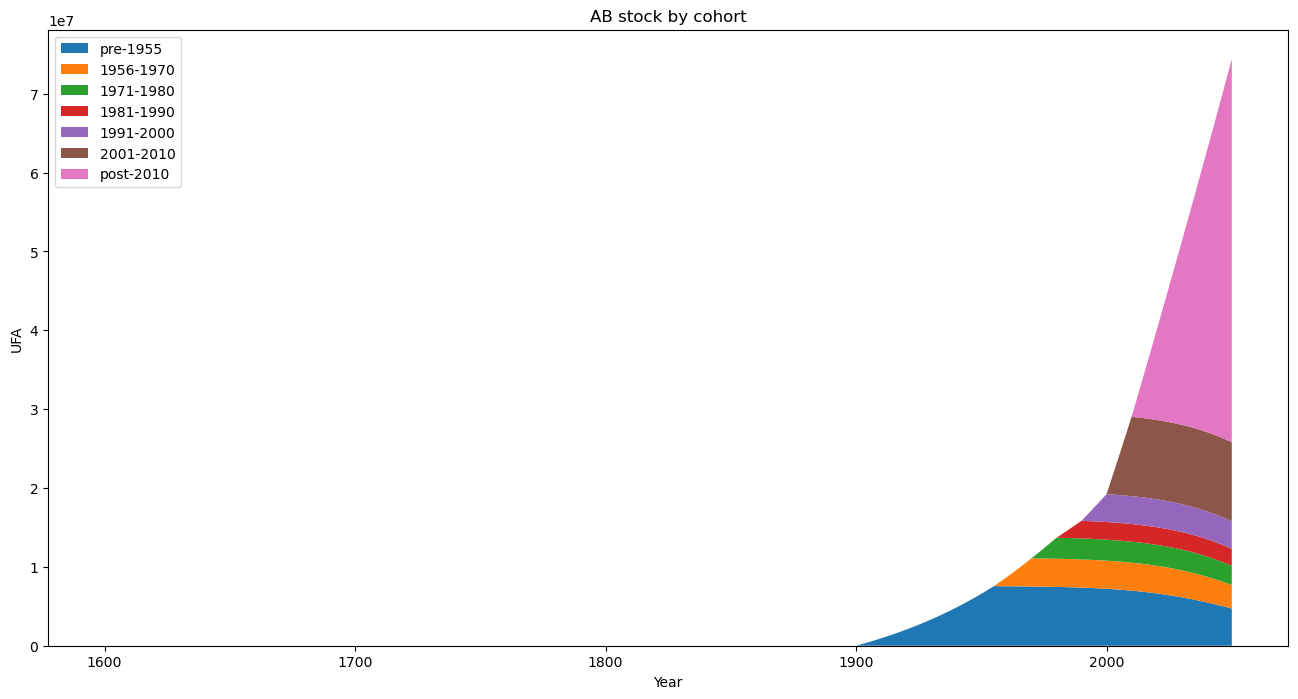

In [30]:
# Plot AB stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    AB_UFA_stock_by_tabula_cohort.loc[:,'pre-1955'], 
    AB_UFA_stock_by_tabula_cohort.loc[:,'1956-1970'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'1971-1980'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'1981-1990'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'1991-2000'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'2001-2010'],
    AB_UFA_stock_by_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('AB stock by cohort')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/ab_ufa_stock_by_cohort.jpeg', 
    bbox_inches='tight')

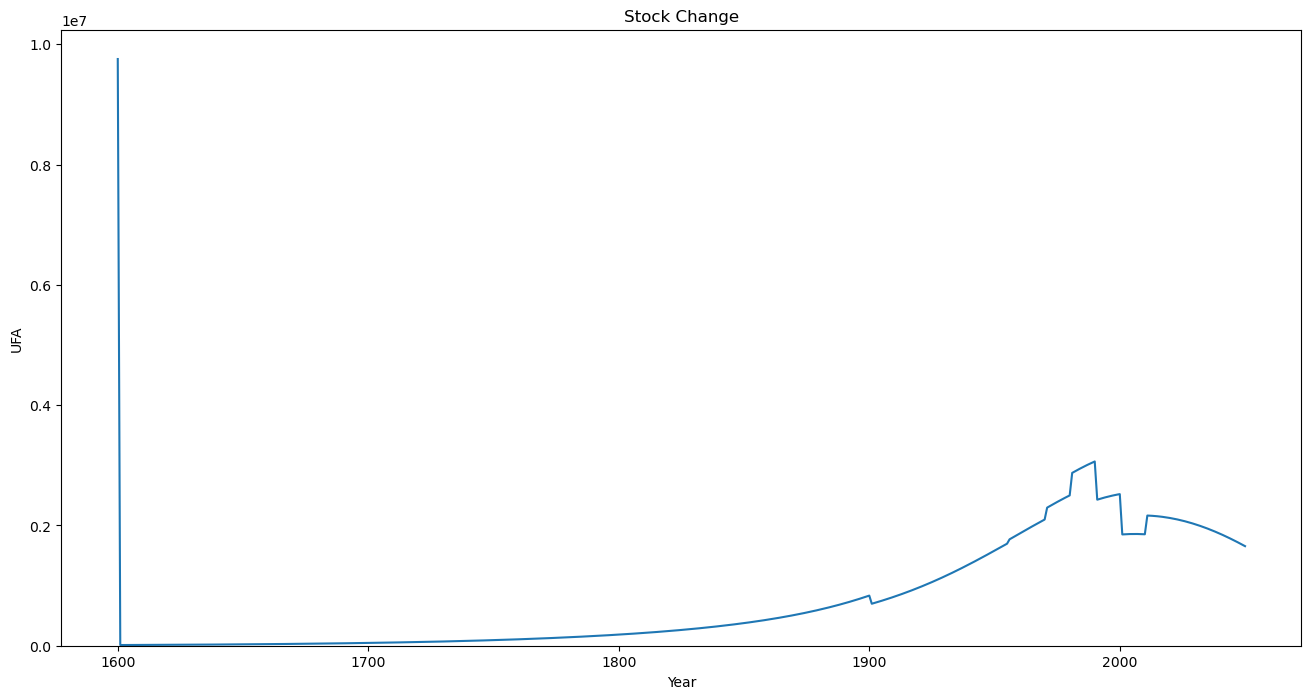

In [31]:
# Plot total stock change UFA
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), stock_change_total_UFA)
plt.title('Stock Change')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/stock_change_total_ufa.jpeg', 
    bbox_inches='tight')

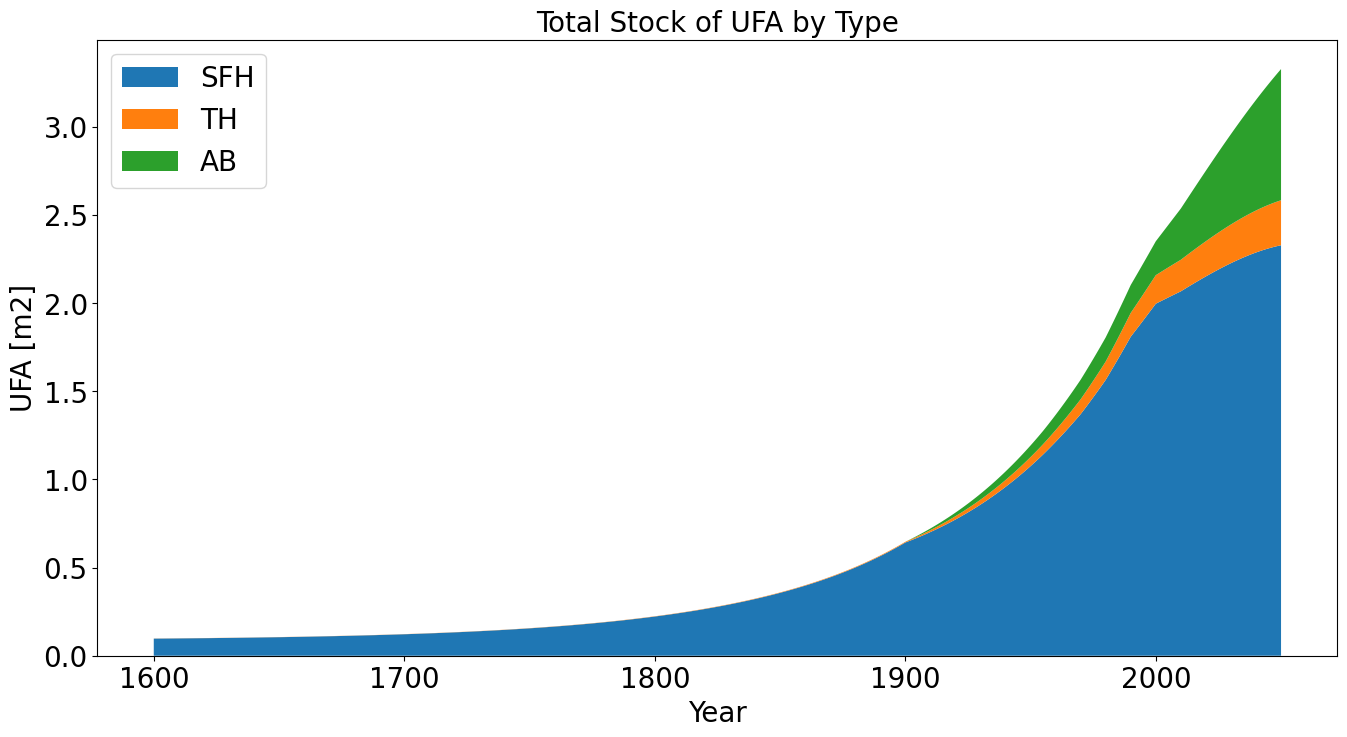

In [32]:
# Plot stock UFA by type
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    s_UFA_c_SFH_df.sum(axis=1)/100000000, 
    s_UFA_c_TH_df.sum(axis=1)/100000000, 
    s_UFA_c_AB_df.sum(axis=1)/100000000,
    labels=['SFH', 'TH', 'AB']
    )

plt.title('Total Stock of UFA by Type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UFA [m2]', fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/UFA_by_type.jpeg', 
    bbox_inches='tight')

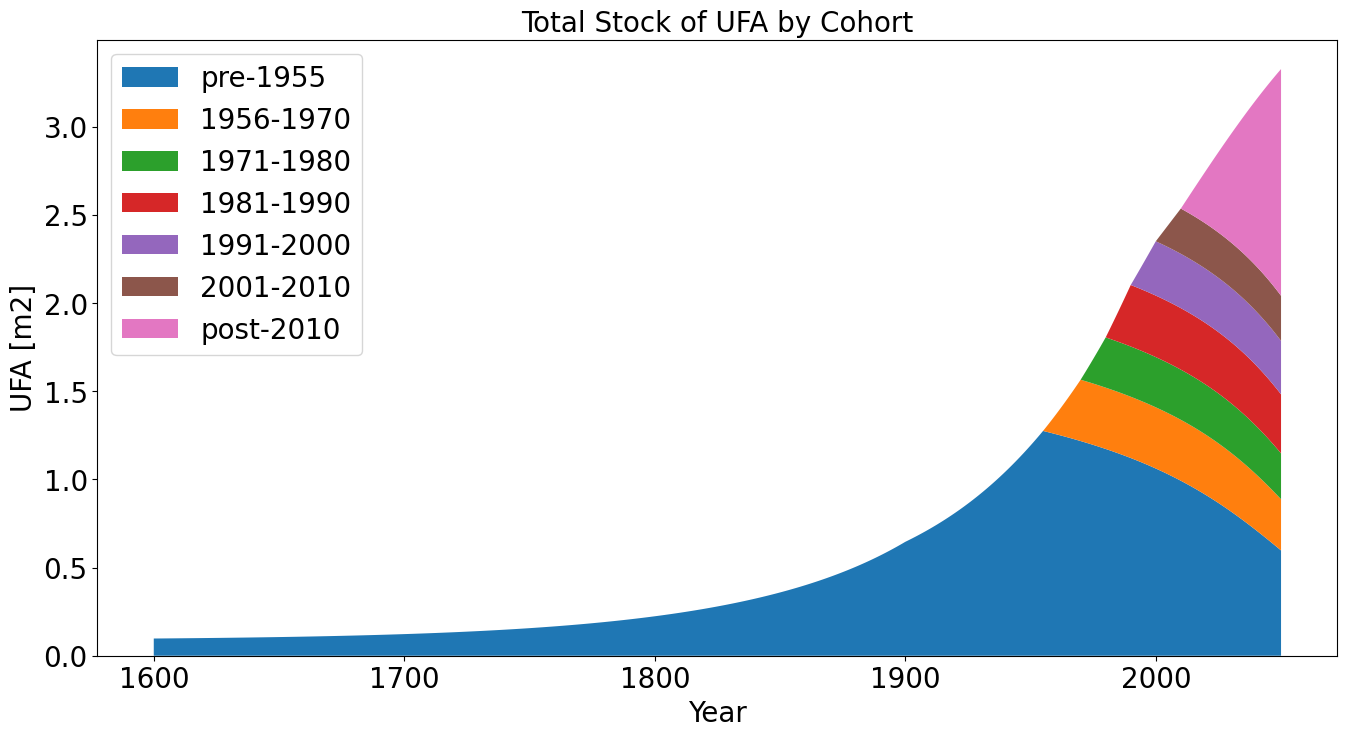

In [33]:
# Plot total stock by tabula cohort
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    total_stock_UFA_by_tabula_cohort.loc[:,'pre-1955']/100000000, 
    total_stock_UFA_by_tabula_cohort.loc[:,'1956-1970']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'1971-1980']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'1981-1990']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'1991-2000']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'2001-2010']/100000000,
    total_stock_UFA_by_tabula_cohort.loc[:,'post-2010']/100000000,
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('Total Stock of UFA by Cohort', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UFA [m2]', fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/UFA_by_cohort.jpeg', 
    bbox_inches='tight')

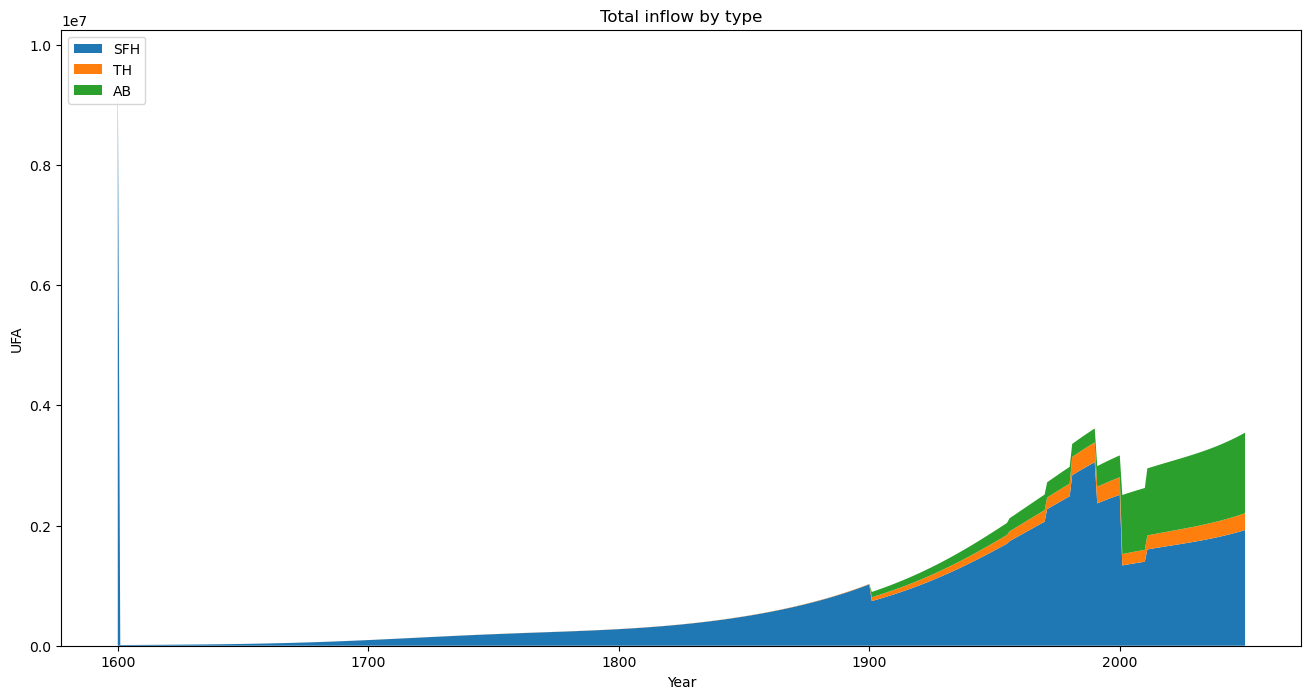

In [34]:
# Plot inflow by type
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), i_SFH_UFA.T, 
    i_TH_UFA.T,
    i_AB_UFA.T,
    labels=[
        'SFH', 'TH', 'AB']
    )

plt.title('Total inflow by type')
plt.xlabel('Year')
plt.legend(loc='upper left')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/total_inflow_by_type.jpeg', 
    bbox_inches='tight')

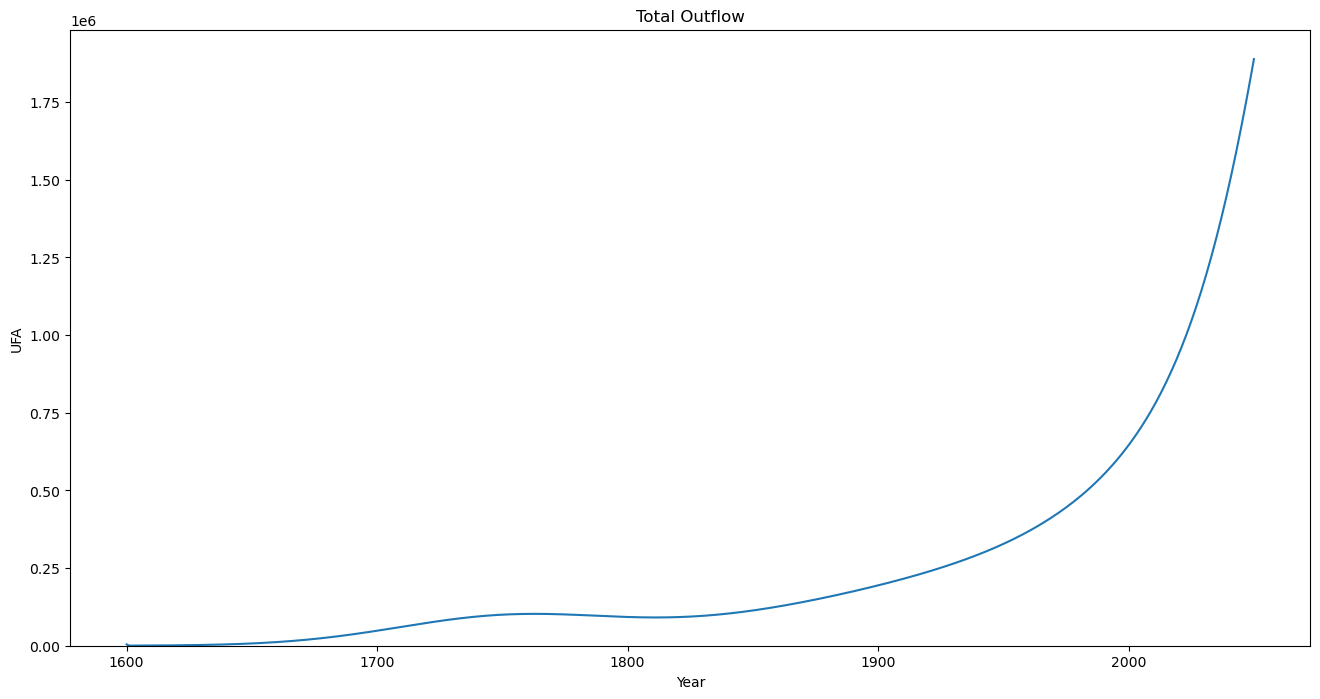

In [35]:
# Plot total outflow UFA
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), o_total_UFA.sum(axis=1))
plt.title('Total Outflow')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/outflow_total_ufa.jpeg', 
    bbox_inches='tight')

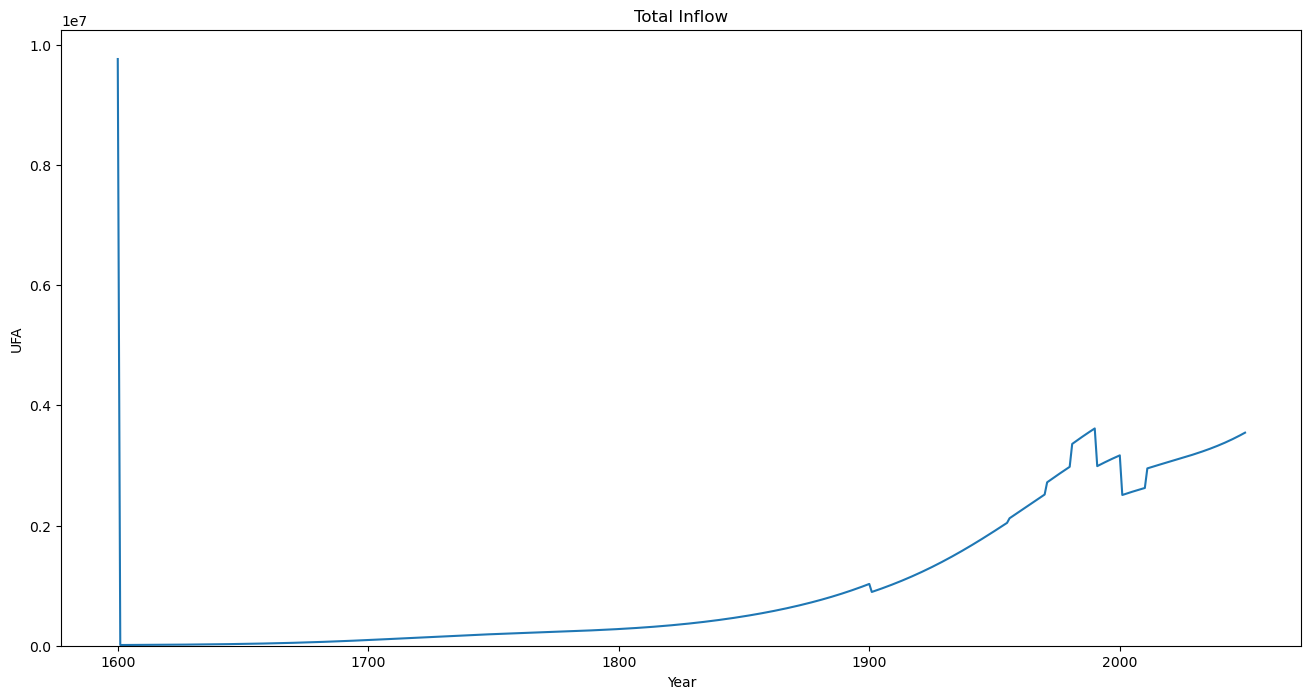

In [36]:
# Plot total inflow UFA
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1600, 2051), i_total_UFA)
plt.title('Total Inflow')
plt.xlabel('Year')
plt.ylabel('UFA')
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/inflow_total_ufa.jpeg', 
    bbox_inches='tight')

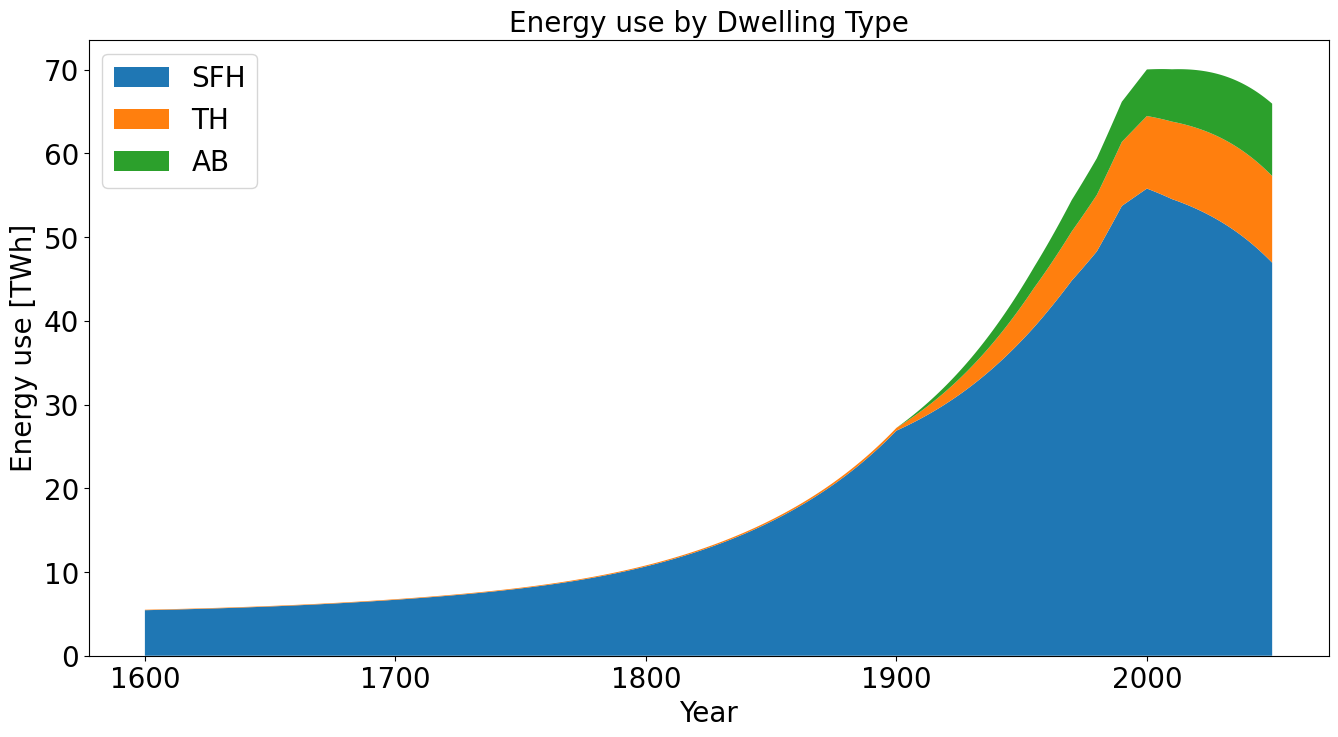

In [37]:
# Energy use by type
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    energy_use_vector_SFH.sum(axis=1)/1000000000, 
    energy_use_vector_TH.sum(axis=1)/1000000000, 
    energy_use_vector_AB.sum(axis=1)/1000000000,
    labels=['SFH', 'TH', 'AB']
    )

plt.title('Energy use by Dwelling Type', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Energy use [TWh]', fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/energy_by_type.jpeg', 
    bbox_inches='tight')

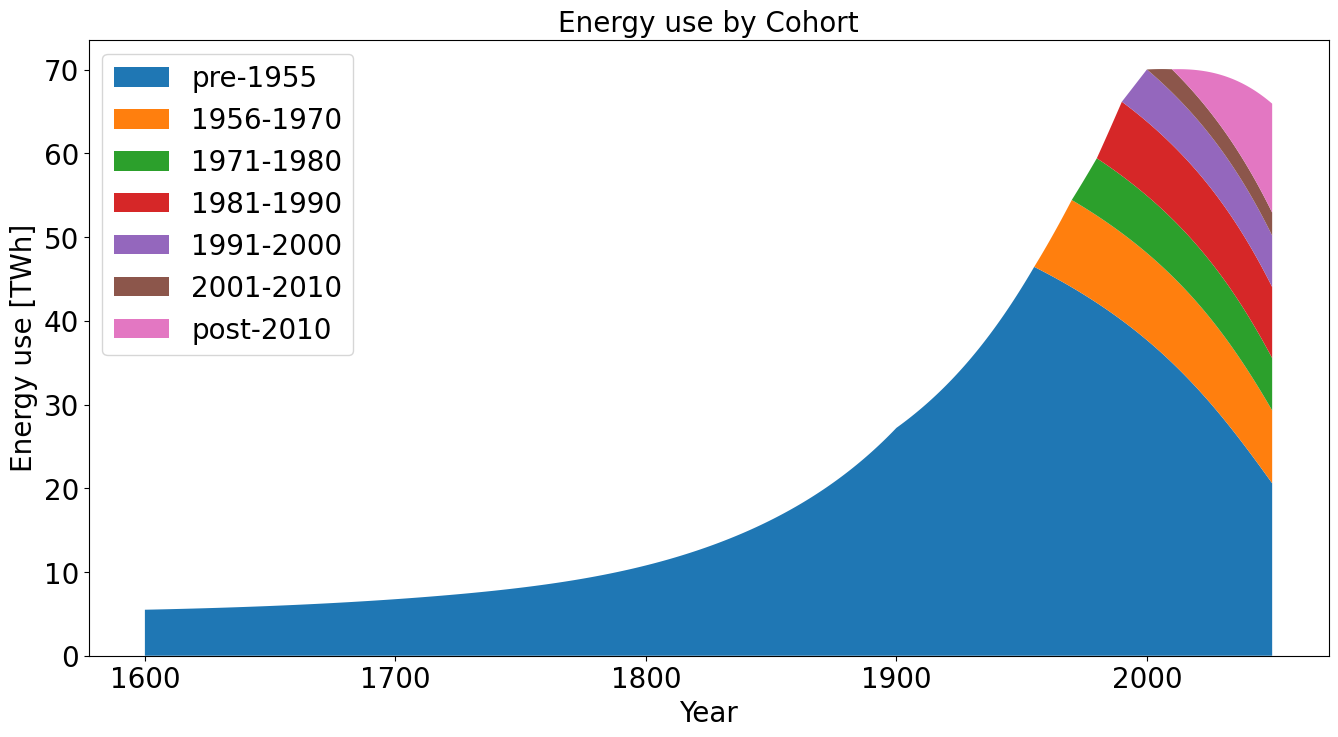

In [38]:
plt.figure(figsize=(16, 8))

plt.stackplot(
    np.arange(1600, 2051), 
    energy_use_matrix_total_tabula_cohort.loc[:,'pre-1955'], 
    energy_use_matrix_total_tabula_cohort.loc[:,'1956-1970'],
    energy_use_matrix_total_tabula_cohort.loc[:,'1971-1980'],
    energy_use_matrix_total_tabula_cohort.loc[:,'1981-1990'],
    energy_use_matrix_total_tabula_cohort.loc[:,'1991-2000'],
    energy_use_matrix_total_tabula_cohort.loc[:,'2001-2010'],
    energy_use_matrix_total_tabula_cohort.loc[:,'post-2010'],
    labels=[
        'pre-1955', '1956-1970', '1971-1980', '1981-1990', '1991-2000', 
        '2001-2010', 'post-2010']
    )

plt.title('Energy use by Cohort', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.ylabel('Energy use [TWh]', fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/model_outputs/energy_by_cohort.jpeg', 
    bbox_inches='tight')

Plot Calibration vs Validation data

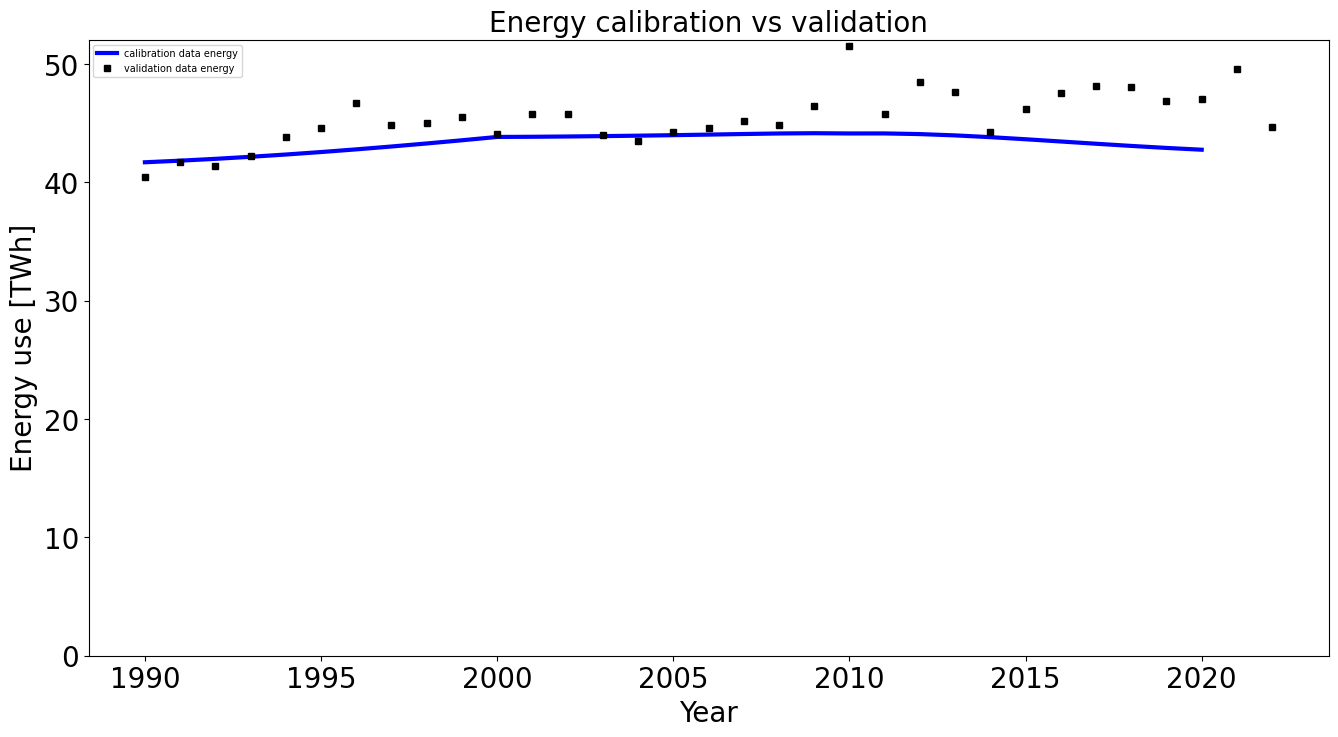

In [39]:
plt.figure(figsize=(16, 8))
plt.plot(
    np.arange(1990,2021), 
    total_energy_use.loc['390':'420']/1000000*0.001, color='blue', lw=3, 
    label = f'calibration data energy')
plt.plot(
    energy_validation.index, energy_validation*0.001, 's', 
    color = 'black', markersize = 5, label = f'validation data energy')
plt.legend(loc='upper left', fontsize=7)
plt.title('Energy calibration vs validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Energy use [TWh]', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/total_energy_use.jpeg', 
    bbox_inches='tight')

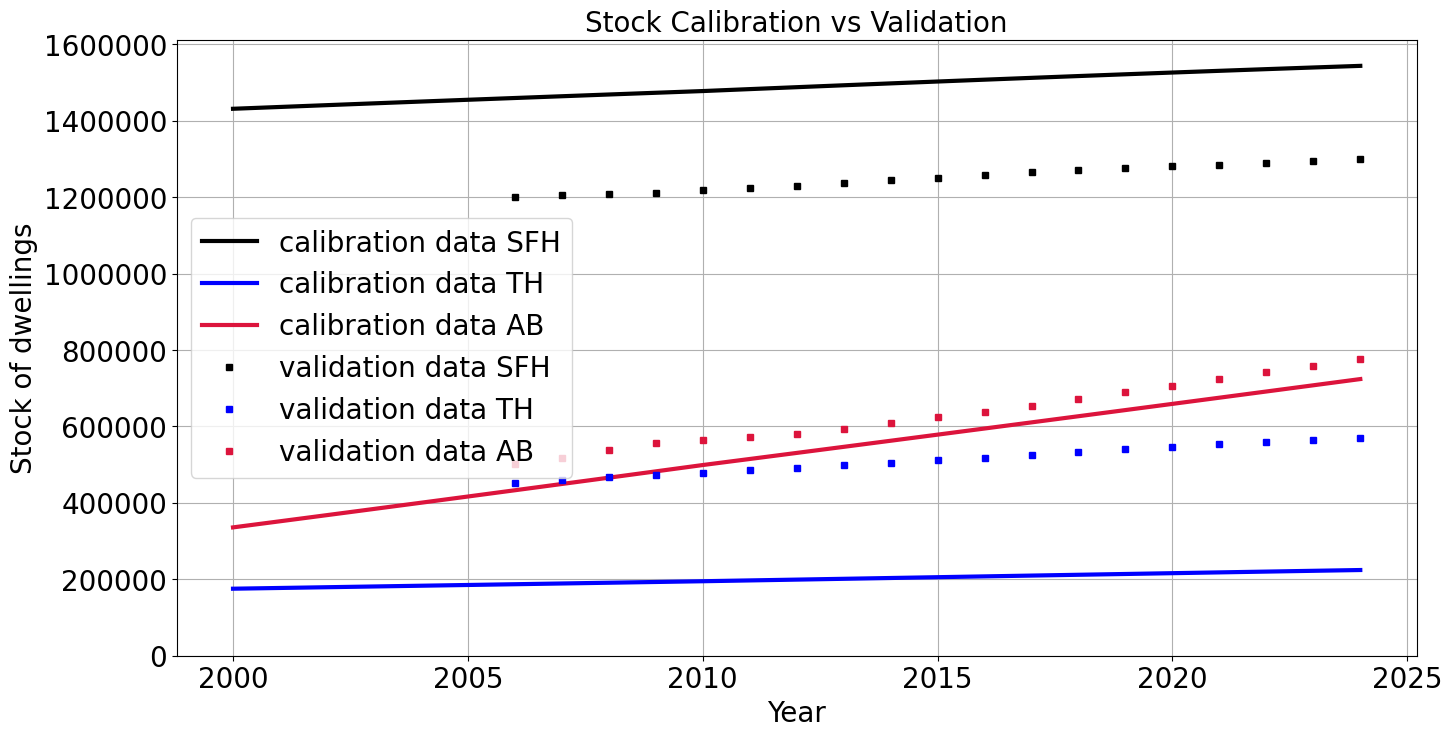

In [40]:
# stock validation

s_SFH_v = s_SFH_df.sum(axis=1)
s_TH_v = s_TH_df.sum(axis=1)
s_AB_v = s_AB_df.sum(axis=1)

plt.figure(figsize=(16, 8))
plt.plot(
    np.arange(2000,2025), s_SFH_v.loc['2000':'2024'], color='black', 
    lw=3, label = f'calibration data SFH')
plt.plot(
    np.arange(2000,2025), s_TH_v.loc['2000':'2024'], color='blue', 
    lw=3, label = f'calibration data TH')
plt.plot(
    np.arange(2000,2025), s_AB_v.loc['2000':'2024'], color='crimson', 
    lw=3, label = f'calibration data AB')

plt.plot(
    stock_validation.index, stock_validation.loc[:,'SFH'], 's', 
    color = 'black', markersize = 5, label = f'validation data SFH')
plt.plot(
    stock_validation.index, stock_validation.loc[:,'TH'], 's', 
    color = 'blue', markersize = 5, label = f'validation data TH')
plt.plot(
    stock_validation.index, stock_validation.loc[:,'AB'], 's', 
    color = 'crimson', markersize = 5, label = f'validation data AB')

plt.title('Stock Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Stock of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
# Disable scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter
(ticker.ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(axis='y', style='plain')
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/stock_by_type.jpeg', 
    bbox_inches='tight')

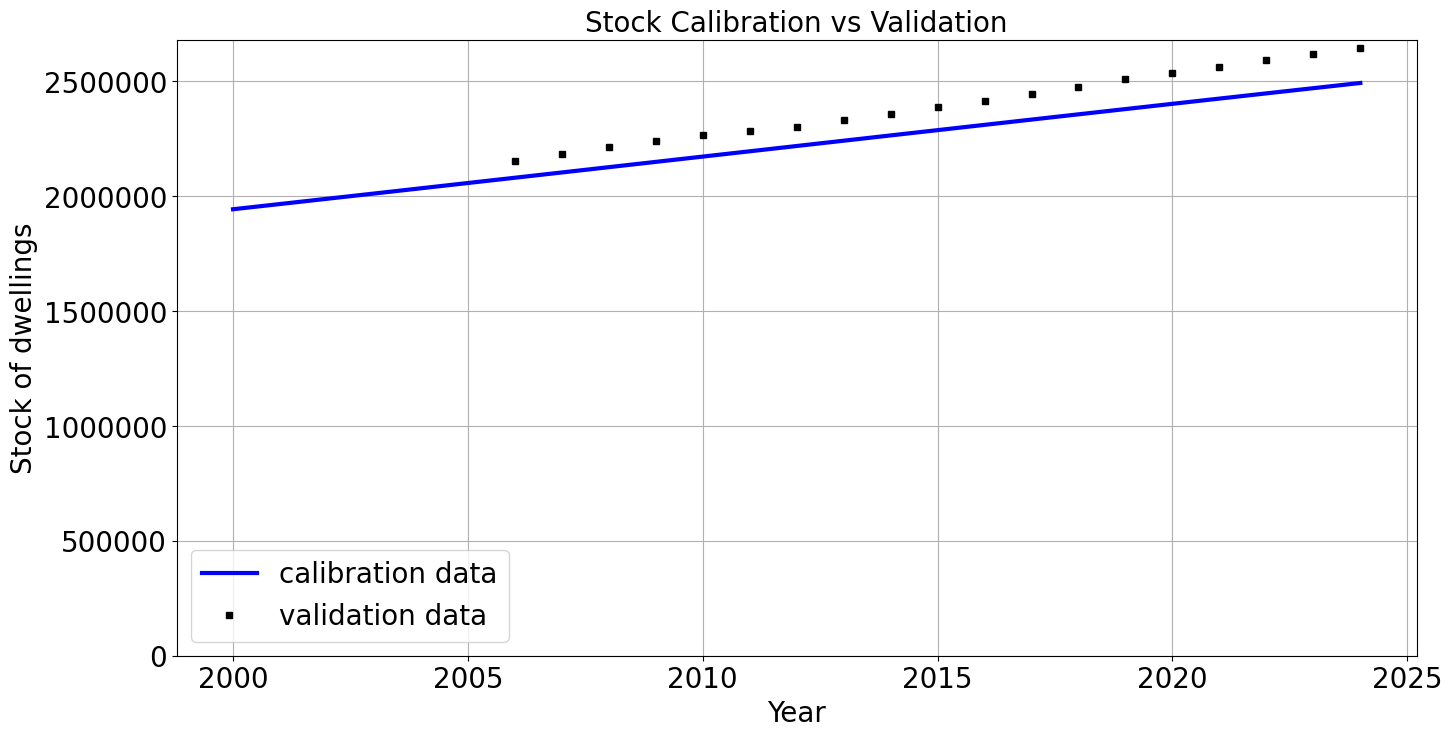

In [41]:
# stock validation

s_SFH_v = s_SFH_df.sum(axis=1)
s_TH_v = s_TH_df.sum(axis=1)
s_AB_v = s_AB_df.sum(axis=1)

total_stock_calibration = s_SFH_v + s_TH_v + s_AB_v

total_stock_validation = stock_validation.loc[
    :,'SFH'] + stock_validation.loc[:,'TH'] + stock_validation.loc[
        :,'AB']

plt.figure(figsize=(16, 8))
plt.plot(
    np.arange(2000,2025), total_stock_calibration.loc['2000':'2024'], 
    color='blue', lw=3, label = f'calibration data')

plt.plot(
    total_stock_validation.index, total_stock_validation, 's', 
    color = 'black', markersize = 5, label = f'validation data')

plt.title('Stock Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='lower left', fontsize=20)
plt.ylabel('Stock of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
# Disable scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter
(ticker.ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(axis='y', style='plain')
plt.grid(True)
plt.savefig(
directory_path / 
'visualizations/baseline/validation_vs_calibration/stock_by_type.jpeg', 
    bbox_inches='tight')

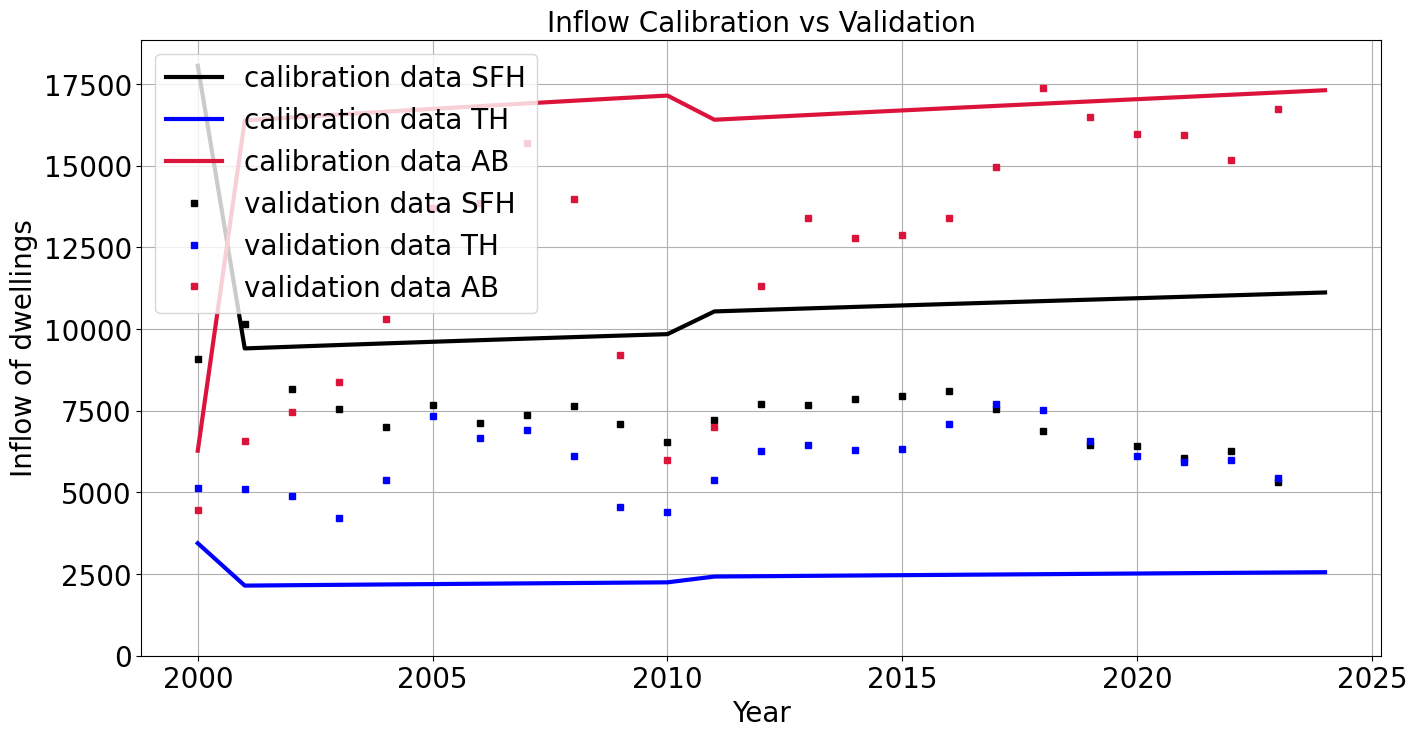

In [42]:
# Inflow validation

plt.figure(figsize=(16, 8))
plt.plot(
    np.arange(2000,2025), i_SFH.loc['2000':'2024'], color='black', 
    lw=3, label = f'calibration data SFH')
plt.plot(
    np.arange(2000,2025), i_TH.loc['2000':'2024'], color='blue', 
    lw=3, label = f'calibration data TH')
plt.plot(
    np.arange(2000,2025), i_AB.loc['2000':'2024'], color='crimson', 
    lw=3, label = f'calibration data AB')

plt.plot(
    np.arange(2000,2024), inflow_validation.loc[:,'SFH'], 's', 
    color = 'black', markersize = 5, label = f'validation data SFH')
plt.plot(
    np.arange(2000,2024), inflow_validation.loc[:,'TH'], 's', 
    color = 'blue', markersize = 5, label = f'validation data TH')
plt.plot(
    np.arange(2000,2024), inflow_validation.loc[:,'AB'], 's', 
    color = 'crimson', markersize = 5, label = f'validation data AB')

plt.title('Inflow Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Inflow of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/inflow_by_type.jpeg', 
    bbox_inches='tight')

In [43]:
total_inflow_calibration = i_SFH.values + i_TH.values + i_AB.values
total_inflow_calibration = pd.DataFrame(
    total_inflow_calibration, index=np.arange(1600,2051))
total_inflow_calibration

,0
1600,73618.578087
1601,88.691810
1602,90.132405
1603,91.604721
1604,93.109851
...,...
2046,34412.202704
2047,34621.481526
2048,34836.687496
2049,35057.866415


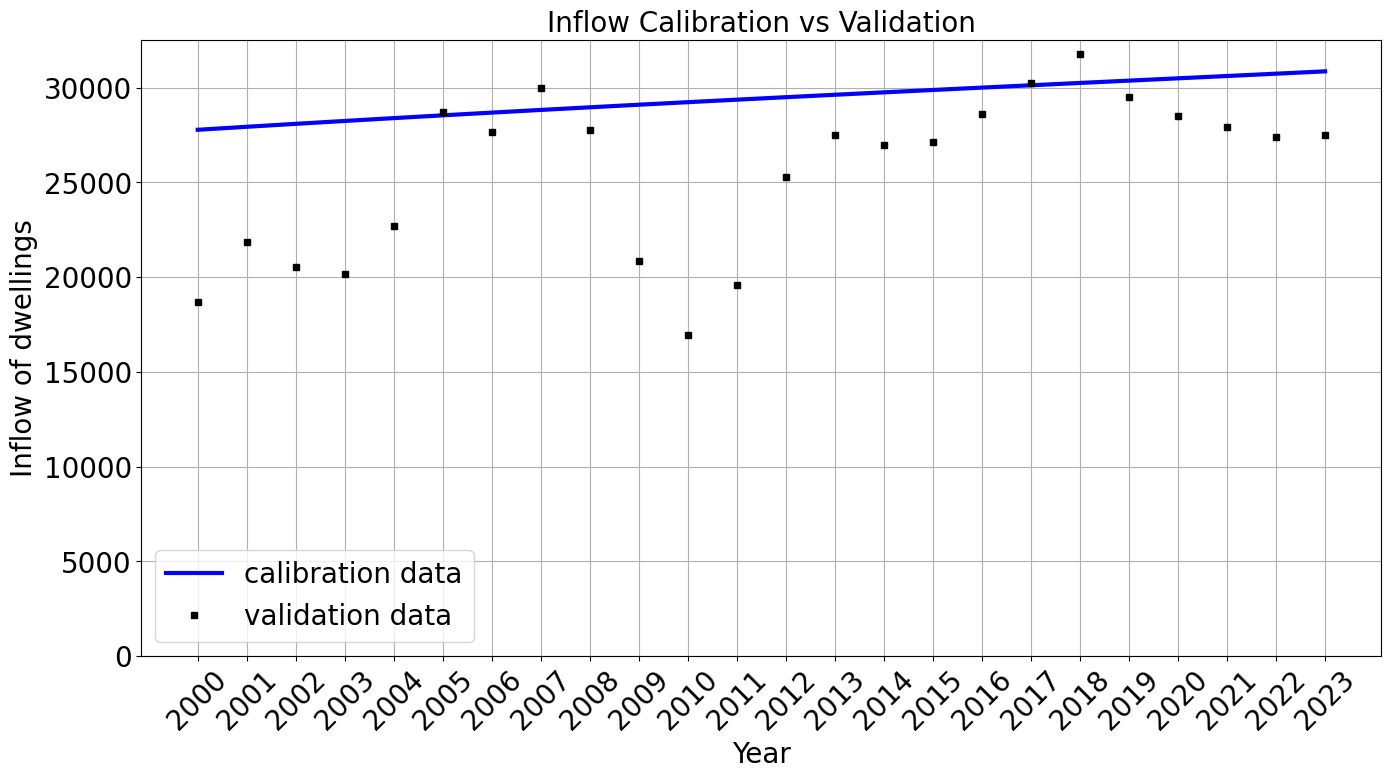

In [44]:
# Inflow validation

total_inflow_validation = inflow_validation.loc[
    :,'SFH'] + inflow_validation.loc[:,'TH'] + inflow_validation.loc[
        :,'AB']

total_inflow_calibration = i_SFH.values + i_TH.values + i_AB.values
total_inflow_calibration = pd.DataFrame(
    total_inflow_calibration, index=np.arange(1600,2051))

plt.figure(figsize=(16, 8))
plt.plot(inflow_validation.index, 
         total_inflow_calibration.loc['2000':'2023'], color='blue', 
         lw=3, label = f'calibration data')

plt.plot(inflow_validation.index, total_inflow_validation, 's', 
         color = 'black', markersize = 5, label = f'validation data')

plt.title('Inflow Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Inflow of dwellings', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/inflow_total.jpeg', 
    bbox_inches='tight')

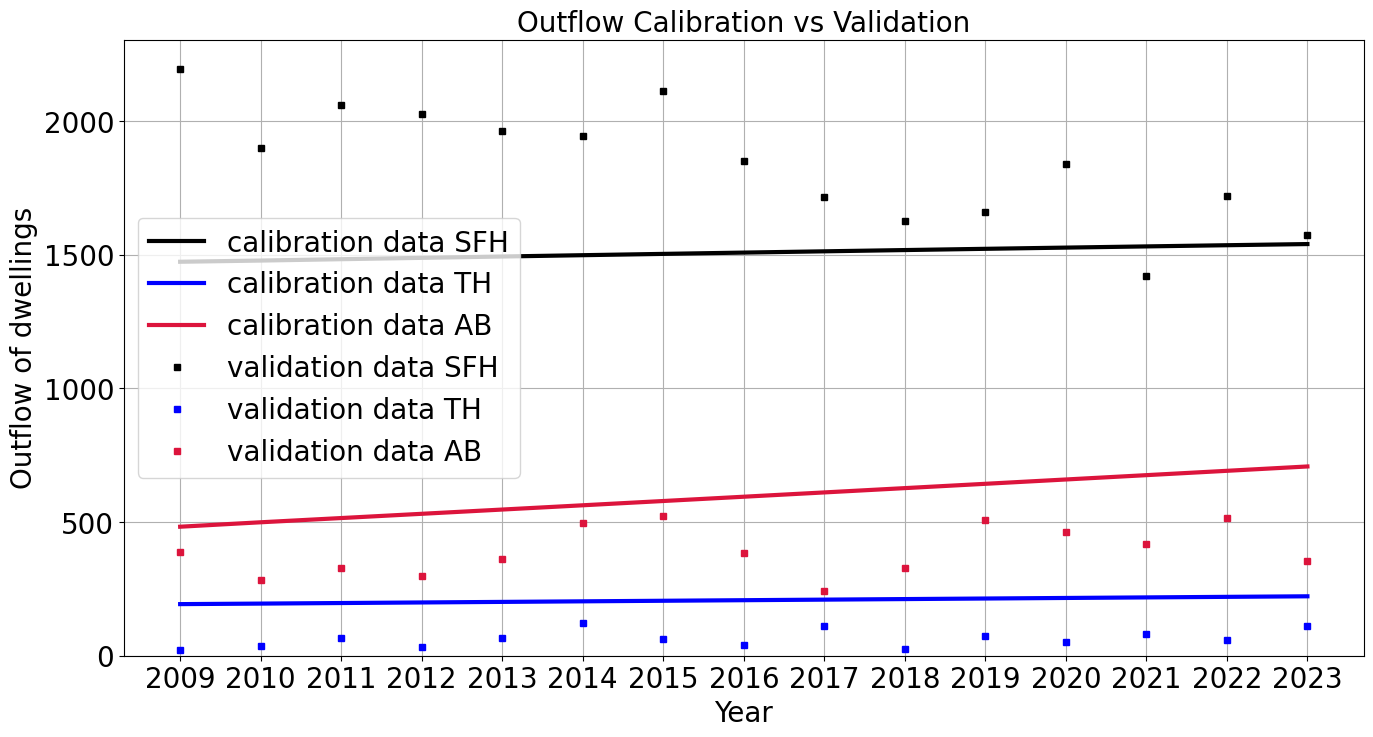

In [45]:
# outflow validation
o_SFH_v = s_SFH_df.sum(axis=1)/1000
o_TH_v = s_TH_df.sum(axis=1)/1000
o_AB_v = s_AB_df.sum(axis=1)/1000

plt.figure(figsize=(16, 8))
plt.plot(
    outflow_validation.index, o_SFH_v.loc['2009':'2023'], color='black',
    lw=3, label = f'calibration data SFH')
plt.plot(
    outflow_validation.index, o_TH_v.loc['2009':'2023'], color='blue', 
    lw=3, label = f'calibration data TH')
plt.plot(
    outflow_validation.index, o_AB_v.loc['2009':'2023'], 
    color='crimson', lw=3, label = f'calibration data AB')

plt.plot(
    outflow_validation.index, 
    outflow_validation.loc[:,'Single Family House (SFH)'], 's', 
    color = 'black', markersize = 5, label = f'validation data SFH')
plt.plot(
    outflow_validation.index, 
    outflow_validation.loc[:,'Terraced House (TH)'], 's', 
    color = 'blue', markersize = 5, label = f'validation data TH')
plt.plot(
    outflow_validation.index, 
    outflow_validation.loc[:,'Apartment Block (AB)'], 's', 
    color = 'crimson', markersize = 5, label = f'validation data AB')

plt.title('Outflow Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Outflow of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/outflow_by_type.jpeg', 
    bbox_inches='tight')

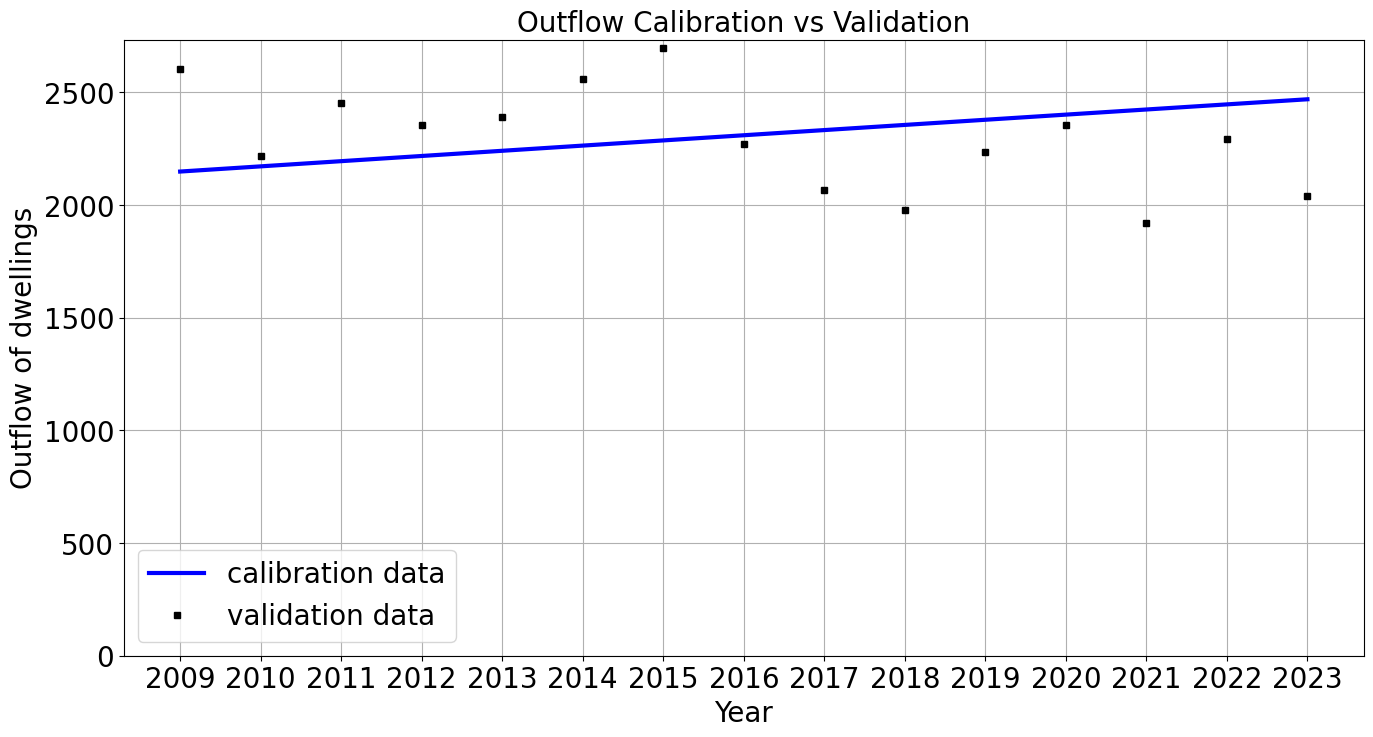

In [46]:
# outflow validation
o_SFH_v = s_SFH_df.sum(axis=1)/1000
o_TH_v = s_TH_df.sum(axis=1)/1000
o_AB_v = s_AB_df.sum(axis=1)/1000

total_outflow_calibration = o_SFH_v + o_TH_v + o_AB_v

total_outflow_validation = outflow_validation.loc[
    :,'Single Family House (SFH)'] + outflow_validation.loc[
        :,'Terraced House (TH)'] + outflow_validation.loc[
            :,'Apartment Block (AB)']
plt.figure(figsize=(16, 8))
plt.plot(
    outflow_validation.index, 
    total_outflow_calibration.loc['2009':'2023'], color='blue', lw=3, 
    label = f'calibration data')

plt.plot(
    outflow_validation.index, 
    total_outflow_validation, 's', color = 'black', markersize = 5, 
    label = f'validation data')

plt.title('Outflow Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='lower left', fontsize=20)
plt.ylabel('Outflow of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/outflow_total.jpeg', 
    bbox_inches='tight')

how to make 3d plots: https://www.educba.com/pandas-3d-dataframe/

UFA stock validation

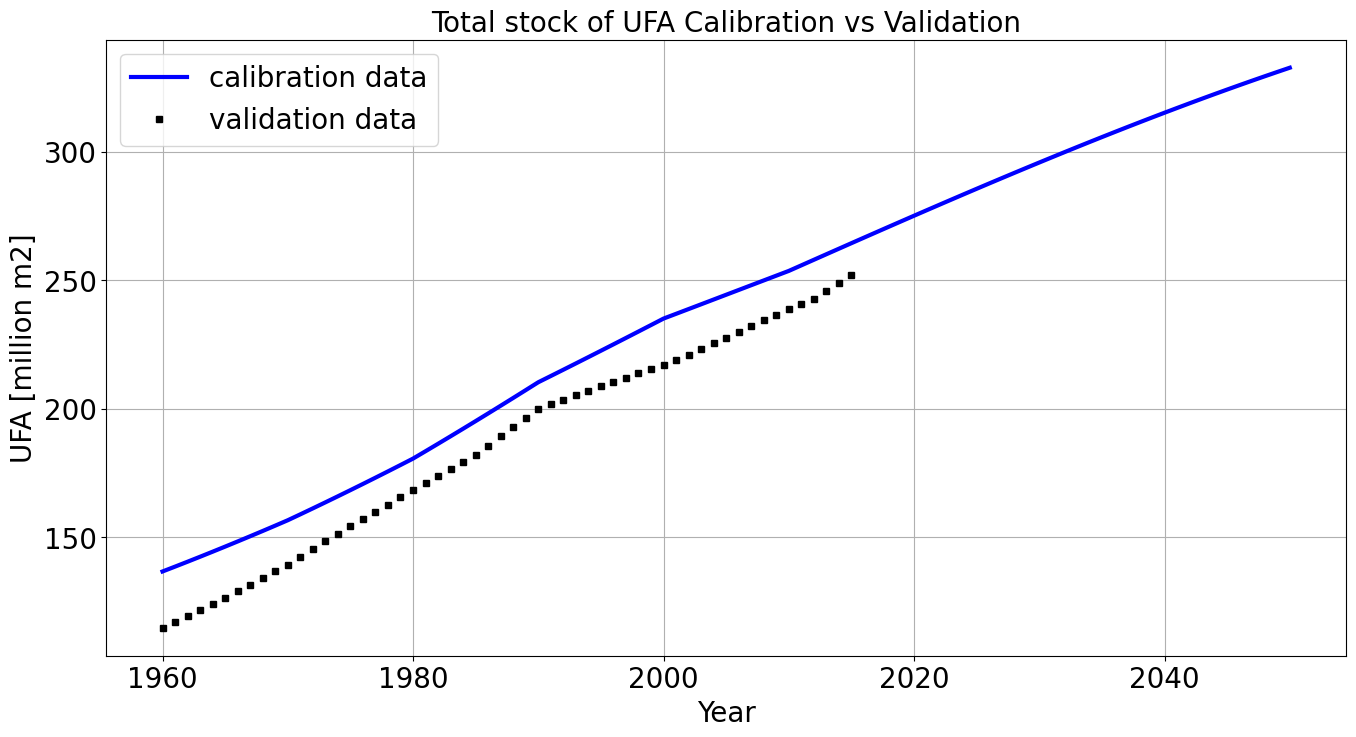

In [47]:
#UFA_stock_validation in million m2

plt.figure(figsize=(16, 8))

plt.plot(
    np.arange(1960,2051), 
    total_stock_UFA_by_tabula_cohort.sum(
        axis=1).loc['1960':'2050']/1000000, 
    color = 'blue', lw = 3, label = f'calibration data')
plt.plot(
    UFA_stock_validation.index, UFA_stock_validation, 
    's', color = 'black', markersize = 5, label = f'validation data')


plt.title('Total stock of UFA Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('UFA [million m2]', fontsize=20)
plt.grid(True)


UFA inflow validation

(0.0, 2626334.1417696686)

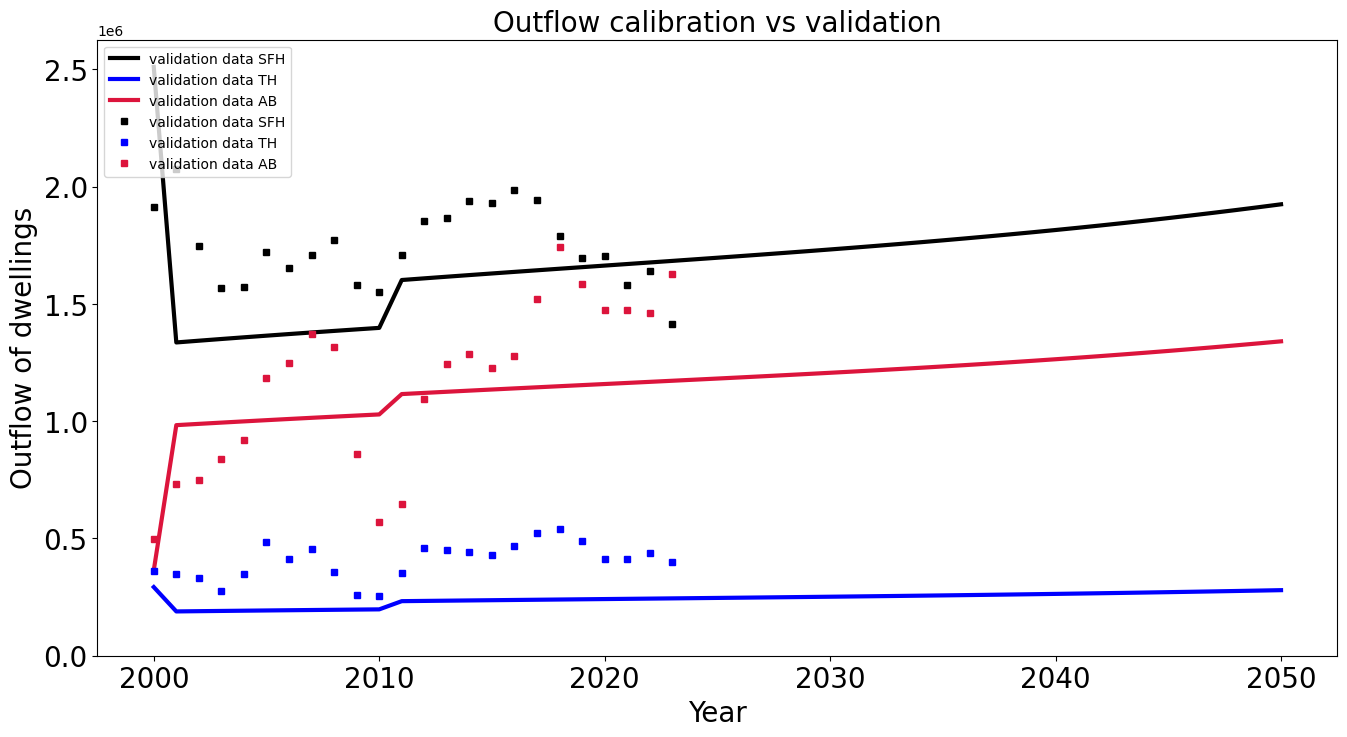

In [48]:
#UFA_inflow_validation

plt.figure(figsize=(16, 8))

plt.plot(
    np.arange(2000,2051), i_SFH_UFA.loc['2000':'2050'], lw=3, 
    color = 'black', label = f'validation data SFH')
plt.plot(
    np.arange(2000,2051), i_TH_UFA.loc['2000':'2050'], lw=3, 
    color = 'blue', label = f'validation data TH')
plt.plot(
    np.arange(2000,2051), i_AB_UFA.loc['2000':'2050'], lw=3, 
    color = 'crimson', label = f'validation data AB')



plt.plot(UFA_inflow_validation.index, 
         UFA_inflow_validation.loc[:,'SFH'], 's', color = 'black', 
         markersize = 5, label = f'validation data SFH')
plt.plot(UFA_inflow_validation.index, 
         UFA_inflow_validation.loc[:,'TH'], 's', color = 'blue', 
         markersize = 5, label = f'validation data TH')
plt.plot(UFA_inflow_validation.index, 
         UFA_inflow_validation.loc[:,'AB'], 's', color = 'crimson', 
         markersize = 5, label = f'validation data AB')

plt.title('Outflow calibration vs validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=10)
plt.ylabel('Outflow of dwellings', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)

In [49]:
i_SFH_UFA

,SFH
Year,
1600,9.699886e+06
1601,1.168591e+04
1602,1.187573e+04
1603,1.206972e+04
1604,1.226803e+04
...,...
2046,1.877028e+06
2047,1.888443e+06
2048,1.900181e+06


In [50]:
total_inflow_UFA_calibration = i_SFH_UFA.loc[:,'SFH'] + i_TH_UFA.loc[
    :,'TH'] + i_AB_UFA.loc[:,'AB']
total_inflow_UFA_calibration

Year
1600    9.760351e+06
1601    1.175876e+04
1602    1.194975e+04
1603    1.214495e+04
1604    1.234450e+04
            ...     
2046    3.456843e+06
2047    3.477866e+06
2048    3.499485e+06
2049    3.521703e+06
2050    3.544523e+06
Length: 451, dtype: float64

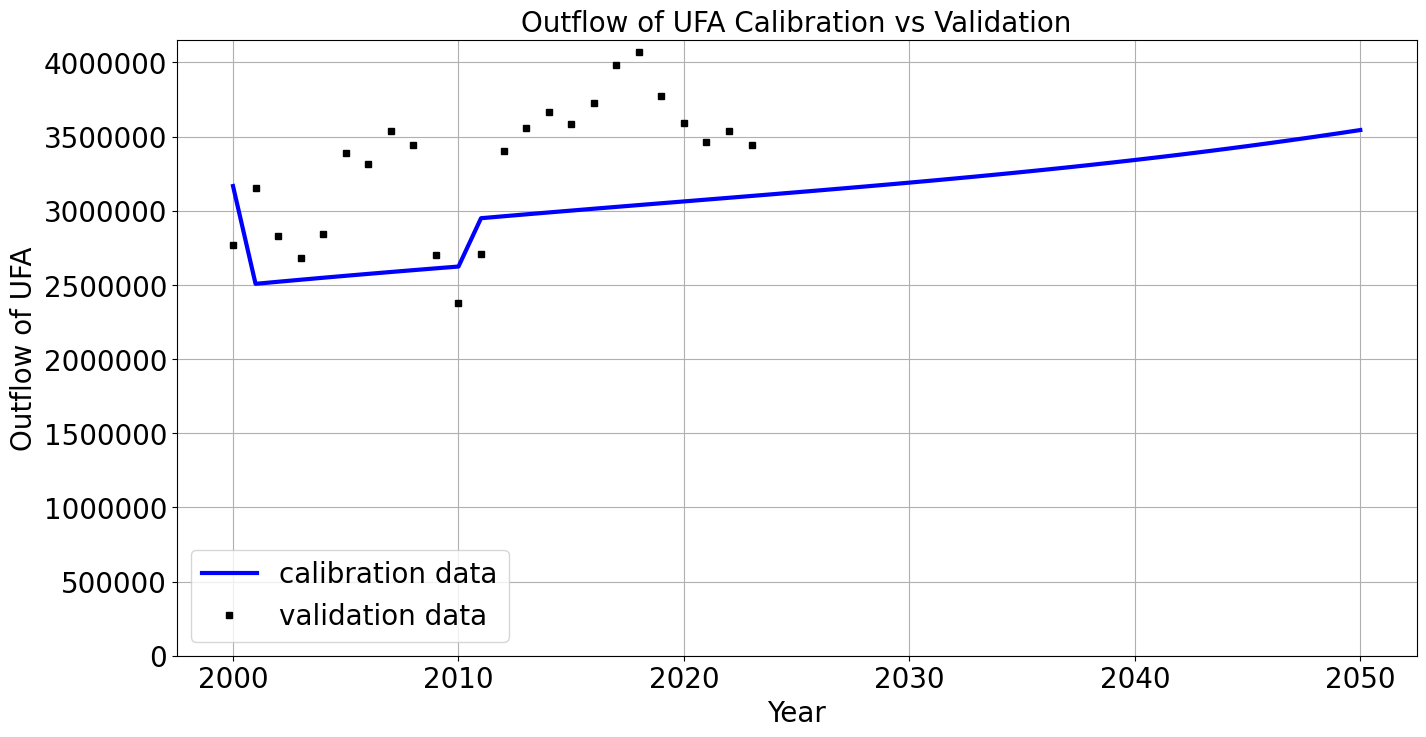

In [51]:
# outflow UFA validation

total_inflow_UFA_calibration = i_SFH_UFA.loc[:,'SFH'] + i_TH_UFA.loc[
    :,'TH'] + i_AB_UFA.loc[:,'AB']

total_inflow_UFA_validation = UFA_inflow_validation.loc[
    :,'SFH'] + UFA_inflow_validation.loc[
        :,'TH'] + UFA_inflow_validation.loc[:,'AB']

plt.figure(figsize=(16, 8))
plt.plot(
    np.arange(2000,2051), 
    total_inflow_UFA_calibration.loc['2000':'2050'], color='blue', 
    lw=3, label = f'calibration data')
plt.plot(
    total_inflow_UFA_validation.index, total_inflow_UFA_validation, 
    's', color = 'black', markersize = 5, label = f'validation data')

plt.title('Outflow of UFA Calibration vs Validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='best', fontsize=20)
plt.ylabel('Outflow of UFA', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)
# Disable scientific notation on the y-axis
plt.gca().yaxis.set_major_formatter
(ticker.ScalarFormatter(useMathText=False))
plt.gca().ticklabel_format(axis='y', style='plain')
plt.grid(True)
plt.savefig(
    directory_path / 
    'visualizations/baseline/validation_vs_calibration/outflow_total.jpeg', 
    bbox_inches='tight')

Carbon emission validation

In [52]:
total_carbon_emissions.loc[390,0]*0.001/1000

6647.278825464473

In [53]:
total_carbon_emissions.loc[449,0]*0.001/1000

6546.46852407089

(0.0, 7.600051269285489)

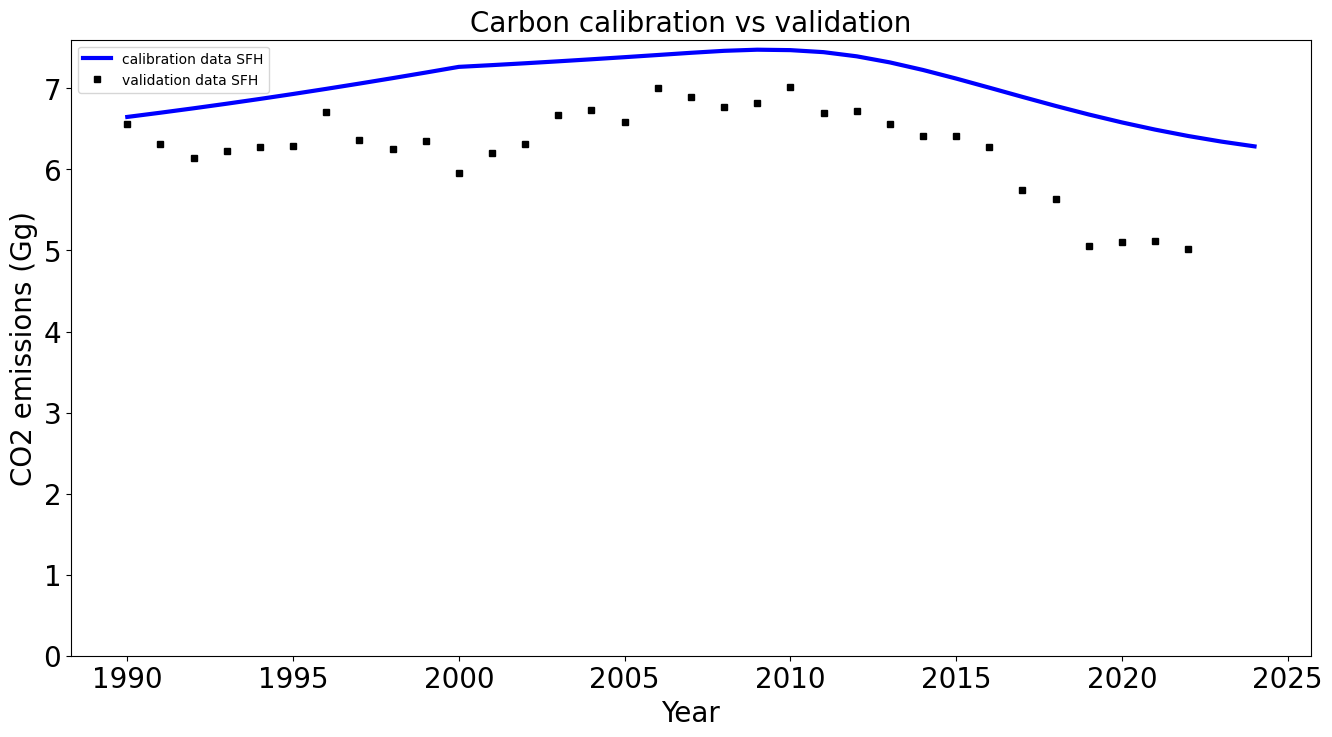

In [54]:



plt.figure(figsize=(16, 8))

plt.plot(
    np.arange(1990,2025), 
    total_carbon_emissions.loc['390':'424']*0.001/1000*0.001, 
    lw=3, color = 'blue', label = f'calibration data SFH')
plt.plot(
    carbon_emissions_validation.index, 
    carbon_emissions_validation*0.001, 's', color = 'black', 
    markersize = 5, label = f'validation data SFH')


plt.title('Carbon calibration vs validation', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=10)
plt.ylabel('CO2 emissions (Gg)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(bottom=0)